<b><b><center><font size = 5>Car Price Prediction Analysis for U.S. Car Dealerships</font></center></b>

<h1>Table of Content</h1>


* [1. Introduction](#Introduction)
    * [1.1 Used Packages](#Used-Packages)
    * [1.2 Import Dataset](#Import-Dataset)
* [2. Data Exploration](#Data-Exploration)
    * [2.1 Dataset Overview](#Dataset-Overview)
    * [2.2 Identify the Problems in the Dataset](#Identify-the-Problems-in-the-Dataset)
        * [2.2.1 Find the Dulicated Values](#Find-the-Dulicated-Values)
        * [2.2.2 Find the Missing Values](#Find-the-Missing-Values)
        * [2.2.3 Figure out Specific Problems in Columns](#Figure-out-Specific-Problems-in-Columns)
* [3. Data Preparing](#Data-Preparing)
    * [3.1 Data Cleaning](#Data-Cleaning)
        * [3.1.1 Dealing with Duplicate Values, Improper Datatype and Missing Values](#Dealing-with-Duplicate-Values,-Improper-Datatype-and-Missing-Values)
        * [3.1.2 Dealing with Outliers](#Dealing-with-Outliers)
            * [Dropping Price Outliers](#Dropping-Price-Outliers)
            * [Dropping Mileage outliers](#Dropping-Mileage-outliers)
            * [Dropping Levy Outliers](#Dropping-Levy-Outliers)
    * [3.2 Facts about the Dataset](#Facts-about-the-Dataset)
        * [3.2.1 Summary Statistics](#Summary-Statistics)
        * [3.2.2 Data Visulization](#Data-Visulization)
        * [3.3 Feature Selection](#Feature-Selection)
            * [3.3.1 Correlation Analysis: Choosing the Most Important Numerical Variables](#Correlation-Analysis:-Choosing-the-Most-Important-Numerical-Variables)
            * [3.4.2 Box Plot Analysis: Choosing the Most Important Categorical Variables](#Box-Plot-Analysis:-Choosing-the-Most-Important-Categorical-Variables)
            * [3.4.3 Feature Engineering](#Feature-Engineering)
            * [3.4.4 Feature Scaling](#Feature-Scaling)
* [4. Model Training](#Model-Training)
    * [4.1 Dataset Splitting](#Dataset-Splitting)
    * [4.2 Multiple Linear Regression](#Multiple-Linear-Regression)
        * [The Most Significant Variables for the Model](#The-Most-Significant-Variables-for-the-Model)
        * [Error Analysis](#Error-Analysis)
    * [4.3 Decision Tree Regressor](#Decision-Tree-Regressor)
        * [The Most Significant Variables for the Model](#The-Most-Significant-Variables-for-the-Model)
        * [Error Analysis](#Error-Analysis)
    * [4.4 Random Forest Regressor](#Random-Forest-Regressor)
        * [The Most Significant Variables for the Model](#The-Most-Significant-Variables-for-the-Model)
        * [Error Analysis](#Error-Analysis)
    * [4.5 Model Evalution](#Model-Evalution)
        * [Measure and Compare Model Performance](#Measure-and-Compare-Model-Performance)
        * [Error Analysis](#Error-Analysis)
        * [Shortlisting the Most Promising Model](#Shortlisting-the-Most-Promising-Model)
        * [Hyper Parameter Adjustment](#Hyper-Parameter-Adjustment)
* [5. Conclusion and Recommendation](#Conclusion-and-Recommendation)
* [6. Reference](#Reference)
* [7. Appendix](#Appendix)
    * [7.1 Trello for Project Management](#Trello-for-Project-Management)
        * [Overall member contribution](#Overall-member-contribution)
        * [Card illustration](#Card-illustration)
        * [Week 1](#Week-1)
        * [Week 2](#Week-2)
        * [Week 3](#Week-3)
        * [Week 4](#Week-4)
        * [Week 5](#Week-5)
    * [7.2 Word Count](#Word-Count)

******

# Introduction

In recent years, car transactions have become a common occurrence for people, the United States Census Bureau (2022) shows that over 90% of occupied households in the U.S. own a car. With the booming automotive industry, 4S store is no longer the only option for purchasing a car; some people now choose to buy used cars from dealers to take advantage of lower prices (Biglaiser et al., 2020).

For car dealers, it is important to accurately predict the price of new and used cars, as the 'quoted price' from manufacturers or pre-owners may either underestimate or overestimate the true value of their cars (Concept Car Credit, 2022; The Car Expert, 2020; Pratt, 2022). However, it is not easy for dealers to accurately measure the worth of a car due to depreciation and varing car conditions.

To aid car dealers in better measuring the value of cars, this project utilized machine learning algorithms to construct statistical models to explore the influence of car features on price, and the best model to estimate car price.

## Used Packages

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#import the packages we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from numpy import sqrt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from IPython import display

In [4]:
# deal with the assignment problems in the data cleaning section
pd.set_option('mode.chained_assignment', None)

## Import Dataset

In [5]:
# The dataset used in this project is a car price dataset.
# It is collected in 2019, containing the information of different cars in the United States.
# It is available from the website "machinehack.com".
# Since it is a public dataset, there is no access authorization we need to get. 
# The dataset is in form of .csv and it is named as "car_price_original".
car_price_original = pd.read_csv("car_price_prediction.csv")

******

# Data Exploration 

## Dataset Overview

In [6]:
# We first take a brief look at the dataset. 
# There are 18 different columns in the dataset which shows different aspects of a car.
# There are 19237 rows and 346,266 variables in total.

# go over the first few lines to get an overview of the dataset
car_price_original.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [7]:
# show the numbers of rows and columns of the dataset
car_price_original.shape

(19237, 18)

In [8]:
# present the basic information of the dataset including the numbers of data and data type
car_price_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [9]:
# Here is a table to explain the meaning of each column
names_var = list(car_price_original.columns)
names_explain = ["The ID number of the car, used to identify", 
                 "The price of the car",
                 "The tax need to pay when sell a car",
                 "The manufacturer of the car",
                 "The model of the car",
                 "The year of production of the car",
                 "The category of the car",
                 "Whether the car has leather interior or not",
                 "Fuel type of the car",
                 "The engine volume of the car",
                 "The mileage of the car",
                 "The number of cylinders of the car",
                 "The gear box type of the car",
                 "Type of drive wheels of the car",
                 "How many doors does the car have",
                 "Type of the wheel of the car",
                 "Colour of the car",
                 "How many airbags does the car have",]
var_explanation = pd.DataFrame({"Variable Name":names_var,
                                "Variable Explanation":names_explain})
var_explanation

,Variable Name,Variable Explanation
0,ID,"The ID number of the car, used to identify"
1,Price,The price of the car
2,Levy,The tax need to pay when sell a car
3,Manufacturer,The manufacturer of the car
4,Model,The model of the car
5,Prod. year,The year of production of the car
6,Category,The category of the car
7,Leather interior,Whether the car has leather interior or not
8,Fuel type,Fuel type of the car
9,Engine volume,The engine volume of the car


## Identify the Problems in the Dataset

### Find the Dulicated Values

In [10]:
# There are 313 repeated values in the dataset.
car_price_original.duplicated().sum()

313

### Find the Missing Values

In [11]:
# As shown below, for the missing values, it looks like there are no NA in the dataset.
car_price_original.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

### Figure out Specific Problems in Columns

The variable type of the dataset is checked below. Based on the above checking of the type of the variable, there is one problem here. There are some columns that should only contain the **`int`** values, such as **`Levy`**, **`Engine Volume`**, **`Mileage`** and **`Doors`**, but now, they are in object type.

In [12]:
car_price_original.dtypes

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

Moreover, the details of some variables are checked below. It shows that there are some non-logic values and strings in the columns including **`Levy`**, **`Engine Volume`**, **`Mileage`** and **`Doors`**. Furthermore, for the **`Leather interior`** column, it is now shows "Yes" or "No" which cannot be interpreted by the model.

In [13]:
# check some columns in detail
car_price_original["Levy"].value_counts()
car_price_original["Engine volume"].value_counts()
car_price_original["Mileage"].value_counts()
car_price_original["Doors"].value_counts()
car_price_original["Leather interior"].value_counts()

-       5819
765      486
891      461
639      410
640      405
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64

2            3916
2.5          2277
1.8          1760
1.6          1462
1.5          1321
             ... 
6.8             1
6.7             1
3.1             1
0.8 Turbo       1
1.1 Turbo       1
Name: Engine volume, Length: 107, dtype: int64

0 km         721
200000 km    183
150000 km    161
160000 km    120
100000 km    119
            ... 
63083 km       1
28750 km       1
25077 km       1
77452 km       1
186923 km      1
Name: Mileage, Length: 7687, dtype: int64

04-May    18332
02-Mar      777
>5          128
Name: Doors, dtype: int64

Yes    13954
No      5283
Name: Leather interior, dtype: int64

****

# Data Preparing

## Data Cleaning

From the above problems identification, we know there are some cleaning we can do for the dataset.
- Remove all repeated and missing values 
- Get rid of non-logic and string element in the **`Levy`**, **`Engine Volume`**, **`Mileage`** and **`Doors`** columns
- Change "Yes" or "No" into "True" and "False" in the **`Leather interior`** column.

In [14]:
# Assigned the original dataset to a new dataset "car_price_cleaning" for future data cleaning
car_price_cleaning = car_price_original

### Dealing with Duplicate Values, Improper Datatype and Missing Values

In [15]:
# First, remove duplicate values. 
# As shown above, there are 313 repeated values in the dataset; we need to remove all of them. 
# After removing the repeated rows, 18924 rows are left.

# check the numbers of duplicated rows
car_price_original.duplicated().sum()
# drop the repeated rows
car_price_cleaning = car_price_cleaning.drop_duplicates(subset=None, keep='first', inplace=False)

313

In [16]:
# Second, cleaning the missing values. 
# As checked above, no missing values are shown as NA directly
# But the "Levy" column does contain some missing values denoted as "-" and there are nearly 6000 rows. 
# They will be changed into NA first, and then drop from the dataset. 
# After dropping missing values, 13215 rows are left. 
# Moreover,  Levy now is in the type of object, and as it is taxation, the variable type is changed into float.

# Levy: replace all "-" to NAN and drop all of them, then change the data type of "Levy" into float
car_price_cleaning["Levy"].replace({"-":np.nan},inplace=True)
car_price_cleaning = car_price_cleaning.dropna(axis=0,how='any')
car_price_cleaning['Levy'] = car_price_cleaning['Levy'].astype(float)

# check the column after cleaning
car_price_cleaning["Levy"].value_counts()

765.0     482
891.0     453
639.0     403
640.0     398
781.0     294
         ... 
3156.0      1
2908.0      1
1279.0      1
1719.0      1
1901.0      1
Name: Levy, Length: 558, dtype: int64

In [17]:
# Third, dealing with the inappropriate types of columns. Many columns have this problem. 
# At first, the values in Mileage column are in object type that the numeric data is mixed up with the string "km".
# So, the unit "km" should be removed and changed this column into the type of integer. 

# Mileage：remove "km" and change the type to int; it has been done in the section of visulization
car_price_cleaning["Mileage"] = car_price_cleaning["Mileage"].str.replace(' km','')
car_price_cleaning["Mileage"] = car_price_cleaning["Mileage"].astype(int)

# Mileage: check the column after cleaning
car_price_cleaning["Mileage"].value_counts()

0         343
90000      45
120000     41
150000     41
130000     38
         ... 
534501      1
62621       1
105022      1
62707       1
186923      1
Name: Mileage, Length: 6734, dtype: int64

In [18]:
# Similar things happen in the columns of Engine Volume that some values are followed by the string "turbo".
# The word “turbo” should be removed, and change the data type into the integer. 

# Engine volume: remove "Turbo" and change the data type into integer
car_price_cleaning["Engine volume"] = car_price_cleaning["Engine volume"].str.replace(' Turbo','')
car_price_cleaning["Engine volume"] = car_price_cleaning["Engine volume"].astype(float)

# Engine volume: check the column after cleaning
car_price_cleaning["Engine volume"].value_counts()

2.0     3439
2.5     1843
1.8     1268
1.6     1184
3.5     1029
1.5      783
2.4      670
3.0      667
1.4      392
4.6      362
1.3      225
2.2      216
3.3      160
1.7      121
2.7       95
3.6       91
1.0       83
4.7       67
4.0       65
1.2       54
5.7       44
4.4       42
2.3       39
5.5       33
3.7       28
0.4       22
6.2       22
3.8       21
5.0       17
3.2       16
0.7       13
4.8       11
1.9       11
0.0       10
0.2        9
2.8        9
5.3        8
2.1        7
0.8        5
5.6        5
4.5        3
2.9        3
6.0        3
0.1        2
4.2        2
3.9        2
6.4        2
20.0       2
5.4        1
7.3        1
6.3        1
6.8        1
3.4        1
6.7        1
1.1        1
4.3        1
2.6        1
5.2        1
Name: Engine volume, dtype: int64

In [19]:
# Besides, for the column of Leather interior, the values shown in the dataset cannot be interpreted by Python 
# so they are changed into boolean values "True" and "False". 

# Leather interior: change the Yes/No into boolean type as True/False
car_price_cleaning["Leather interior"]  = [i=="Yes" for i in car_price_cleaning["Leather interior"]]

# Leather interior: check the column after cleaning
car_price_cleaning["Leather interior"].value_counts()

True     11304
False     1911
Name: Leather interior, dtype: int64

In [20]:
# Also, in the column Doors, value is expressed in a confusing format that all numbers have a "-May" afterwards
# since it is meaningless, they are removed directly. 
# Meanwhile, most values in this column are shown as "2" or "4" which are discrete numbers
# but there are some values like ">5" which represent a range that does not match the forms of other data; 
# as there are only around 30 of them, they are removed from the dataset directly.

# Doors: remove the meaningless "-May" and convert 04-May into 4, convert 02-May into 2
car_price_cleaning["Doors"].replace({"04-May":4,"02-Mar":2},inplace = True)
# Doors: drop the meaningless and impropoer values of ">5" from the dataset
car_price_cleaning = car_price_cleaning.drop(car_price_cleaning[car_price_cleaning["Doors"]==">5"].index)
# Doors: change the data type into int
car_price_cleaning["Doors"] = car_price_cleaning["Doors"].astype(int)

# Doors: check the column after cleaning
car_price_cleaning["Doors"].value_counts()

4    12969
2      212
Name: Doors, dtype: int64

All problems outlined above are solved. Now, check the basic information of the new dataset.

In [21]:
# go over the first few line of the dataset after cleaning
car_price_cleaning.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,True,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,False,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,True,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,True,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4
5,45802912,39493,891.0,HYUNDAI,Santa FE,2016,Jeep,True,Diesel,2.0,160931,4.0,Automatic,Front,4,Left wheel,White,4


In [22]:
# get the basic information of the dataset after cleaning
car_price_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13181 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                13181 non-null  int64  
 1   Price             13181 non-null  int64  
 2   Levy              13181 non-null  float64
 3   Manufacturer      13181 non-null  object 
 4   Model             13181 non-null  object 
 5   Prod. year        13181 non-null  int64  
 6   Category          13181 non-null  object 
 7   Leather interior  13181 non-null  bool   
 8   Fuel type         13181 non-null  object 
 9   Engine volume     13181 non-null  float64
 10  Mileage           13181 non-null  int64  
 11  Cylinders         13181 non-null  float64
 12  Gear box type     13181 non-null  object 
 13  Drive wheels      13181 non-null  object 
 14  Doors             13181 non-null  int64  
 15  Wheel             13181 non-null  object 
 16  Color             13181 non-null  object

### Dealing with Outliers

Based on the dictionary, we can know that most of the data in the dataset do not have the outlier problem. For example, the data which are inherently in terms of object do not have this problem. Moreover, it is not a problem for the data like ID, since it does not have economic meaning. Also, the numerical values in some columns are categorical values including **`Production Year`**, **`Engine Volume`**, **`Cylinders`**, **`Doors`** and **`Airbags`**, so the outliers are not a problem for them. But the columns like **`Price`**, **`Mileage`** and **`Levy`** might face the problems of outliers. 

Boxplot and Histogram are used to check whether there are outliers in these columns, and the interquartile method is used to remove the outliers. The histogram and box plot are presented before and after dropping outliers to show the effectiveness of outliers removing.

In [23]:
# Assigned the previous dataset to a new dataset "car_price_outlier_dropping" for future outlier removing
car_price_outlier_dropping = car_price_cleaning

In [24]:
# check the dataset before droping outliers
car_price_outlier_dropping

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,True,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,False,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,True,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,True,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4
5,45802912,39493,891.0,HYUNDAI,Santa FE,2016,Jeep,True,Diesel,2.0,160931,4.0,Automatic,Front,4,Left wheel,White,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,45772306,5802,1055.0,MERCEDES-BENZ,E 350,2013,Sedan,True,Diesel,3.5,107800,6.0,Automatic,Rear,4,Left wheel,Grey,12
19233,45778856,15681,831.0,HYUNDAI,Sonata,2011,Sedan,True,Petrol,2.4,161600,4.0,Tiptronic,Front,4,Left wheel,Red,8
19234,45804997,26108,836.0,HYUNDAI,Tucson,2010,Jeep,True,Diesel,2.0,116365,4.0,Automatic,Front,4,Left wheel,Grey,4
19235,45793526,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,True,Diesel,2.0,51258,4.0,Automatic,Front,4,Left wheel,Black,4


In [25]:
# get an understanding of the dataset first before droping any data
# it is obvious that there are many extreme values in some columns
car_price_outlier_dropping.describe()

,ID,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags
count,1.318100e+04,13181.000000,13181.000000,13181.000000,13181.000000,1.318100e+04,13181.000000,13181.000000,13181.000000
mean,4.566786e+07,17312.436841,905.991124,2013.136408,2.315666,3.768889e+05,4.513997,3.967832,6.869433
std,4.731236e+05,19353.633503,462.581243,3.051042,0.872869,2.063157e+07,1.123506,0.251605,4.465772
min,3.175700e+07,1.000000,87.000000,1965.000000,0.000000,0.000000e+00,1.000000,2.000000,0.000000
25%,4.572698e+07,3763.000000,640.000000,2011.000000,1.800000,6.800000e+04,4.000000,4.000000,4.000000
50%,4.577024e+07,13589.000000,781.000000,2013.000000,2.000000,1.186430e+05,4.000000,4.000000,4.000000
75%,4.580313e+07,23521.000000,1058.000000,2015.000000,2.500000,1.793810e+05,4.000000,4.000000,12.000000
max,4.581665e+07,872946.000000,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,4.000000,16.000000


The method we use here to clean the outliers is called "Interquantile Range Method" (IQR). This method will identify the values that are bigger or smaller than third quantile or the first quantile of the data as outliers.

In [26]:
# Method used to identify the outlier
def outlier_index(col, data):
    index = []
    q1 = np.percentile(data[col],25)
    q3 = np.percentile(data[col],75)
    upper = np.percentile(data[col],75)+1.5*(q3 - q1)
    lower = np.percentile(data[col],25)-1.5*(q3 - q1)
    outlier = data[(data[col]>upper)].index
    index.extend(outlier)
    outlier = data[(data[col]<lower)].index
    index.extend(outlier)
    return index

####  Dropping Price Outliers

<Figure size 640x480 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<AxesSubplot:>

(array([1.3087e+04, 8.8000e+01, 3.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.000000e+00, 8.729550e+04, 1.745900e+05, 2.618845e+05,
        3.491790e+05, 4.364735e+05, 5.237680e+05, 6.110625e+05,
        6.983570e+05, 7.856515e+05, 8.729460e+05]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Price Distribution')

<AxesSubplot:>

<AxesSubplot:title={'center':'Price Distribution'}>

<Figure size 640x480 with 0 Axes>

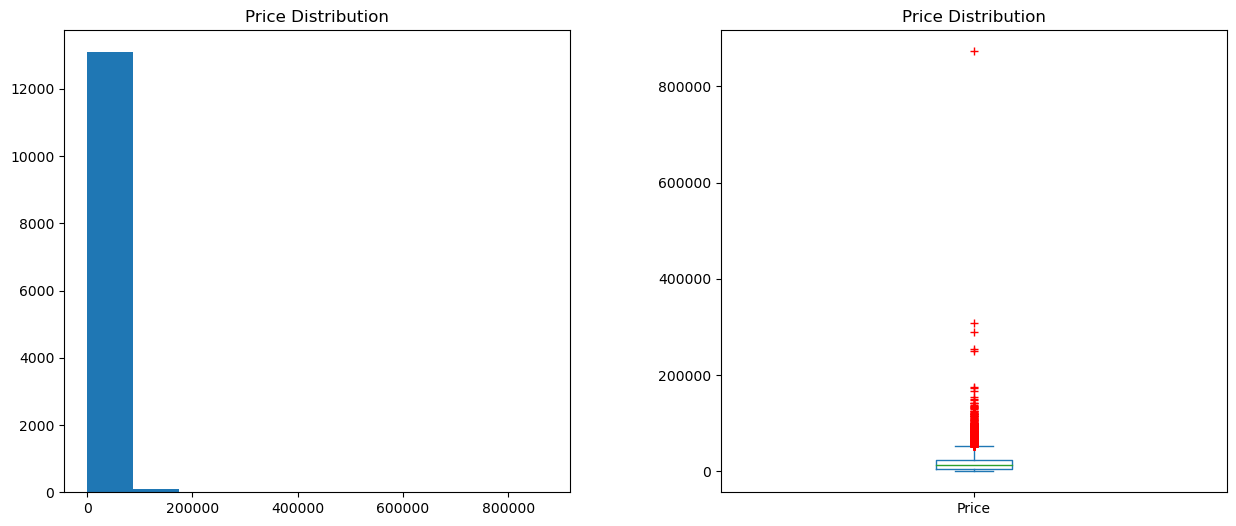

In [27]:
# First, dealing with the price outliers. 
# From the data distribution shown in boxplot and histogram, it is obvious that price has many outliers 
# The total price outliers dropped here is 515.

# Price: check the current data distribution in histogram and box plot
plt.figure()
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
plt.subplots_adjust(wspace = 0.3, hspace =0)
plt.hist(car_price_outlier_dropping["Price"])
plt.title('Price Distribution')
plt.subplot(2,2,2)
price = car_price_outlier_dropping["Price"]
price.plot(kind='box',title='Price Distribution',sym='r+')
plt.show()

In [28]:
# Price: Identify the outliers in column "Price", there are 515 in total
out_price = outlier_index("Price", car_price_outlier_dropping)
total_price_outlier = len(out_price)
print(total_price_outlier)

515


In [29]:
# Price: drop the outliers
car_price_outlier_dropping = car_price_outlier_dropping.drop(out_price)

<Figure size 640x480 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<AxesSubplot:>

(array([3768., 1631., 2161., 1804., 1082.,  678.,  472.,  442.,  388.,
         240.]),
 array([1.00000e+00, 5.31630e+03, 1.06316e+04, 1.59469e+04, 2.12622e+04,
        2.65775e+04, 3.18928e+04, 3.72081e+04, 4.25234e+04, 4.78387e+04,
        5.31540e+04]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Price Distribution after dropping Outliers')

<AxesSubplot:>

<AxesSubplot:title={'center':'Price Distribution after Dropping Outliers'}>

<Figure size 640x480 with 0 Axes>

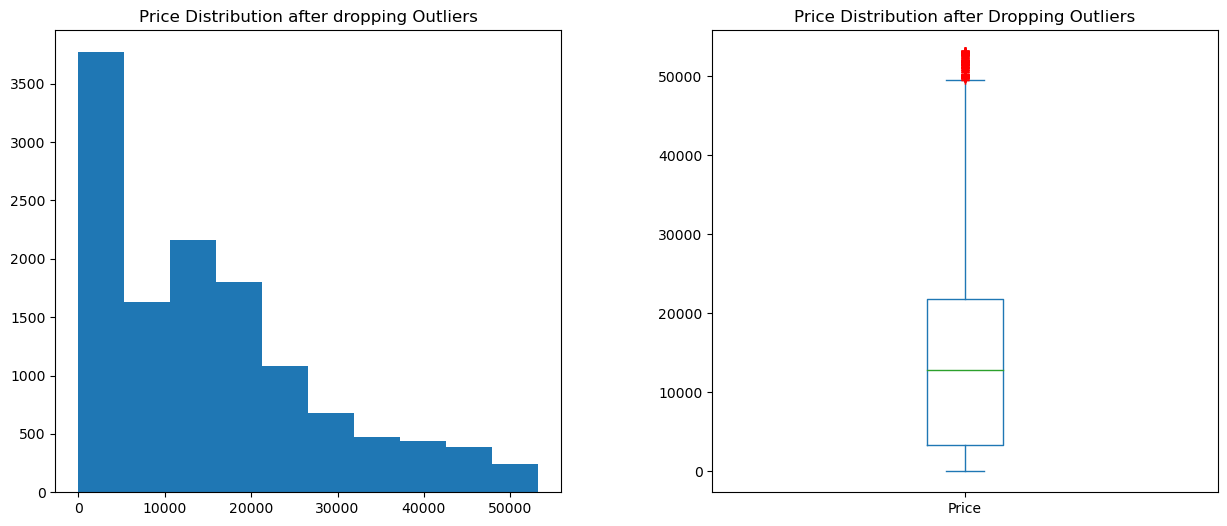

In [30]:
# Price: check the data distribution in histogram and box plot after removing outliers
plt.figure()
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
plt.subplots_adjust(wspace = 0.3, hspace =0)
plt.hist(car_price_outlier_dropping["Price"])
plt.title('Price Distribution after Dropping Outliers')
plt.subplot(2,2,2)
price = car_price_outlier_dropping["Price"]
price.plot(kind='box',title='Price Distribution after Dropping Outliers',sym='r+')

#### Dropping Mileage outliers

<Figure size 640x480 with 0 Axes>

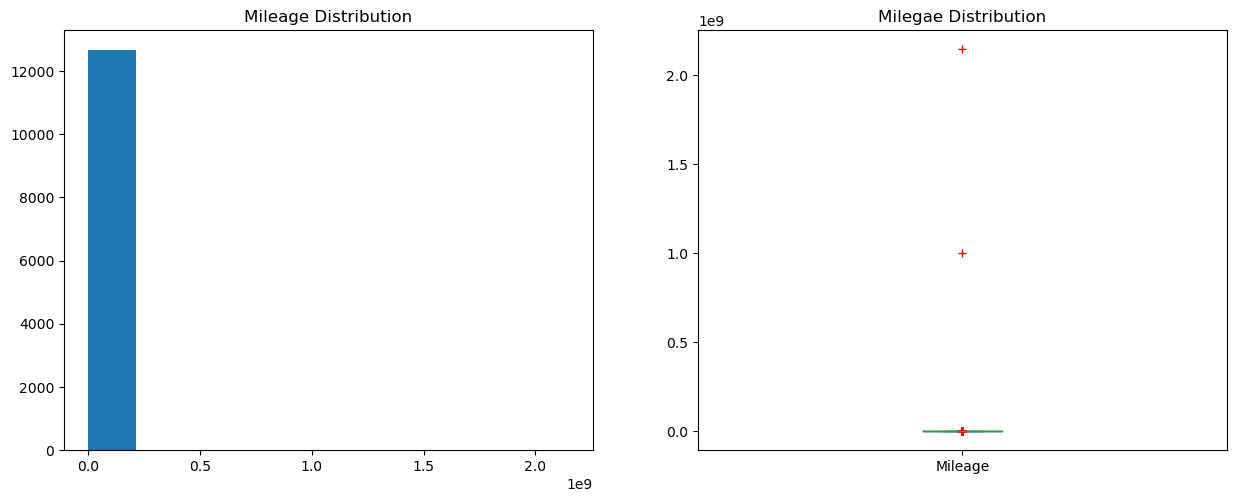

In [31]:
# Second, dealing with the mileage outliers. 
# As shown in boxplot and histogram, there are many outliers for mileage.
# The total mileage outliers dropped here is 581.

# Mileage: check the current data distribution in histogram and box plot
plt.figure()
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
plt.hist(car_price_outlier_dropping["Mileage"])
plt.title("Mileage Distribution")
plt.subplot(2,2,2)
mileage = car_price_outlier_dropping["Mileage"]
mileage.plot(kind='box',title='Milegae Distribution',sym='r+');

In [32]:
# Mileage: Identify the outliers in column "Mileage", there are 581 in total
out_mileage = outlier_index("Mileage",car_price_outlier_dropping)
total_mileage_outlier = len(out_mileage)
print(total_mileage_outlier)

581


In [33]:
# Mileage: drop the outliers
car_price_outlier_dropping = car_price_outlier_dropping.drop(out_mileage)

<Figure size 640x480 with 0 Axes>

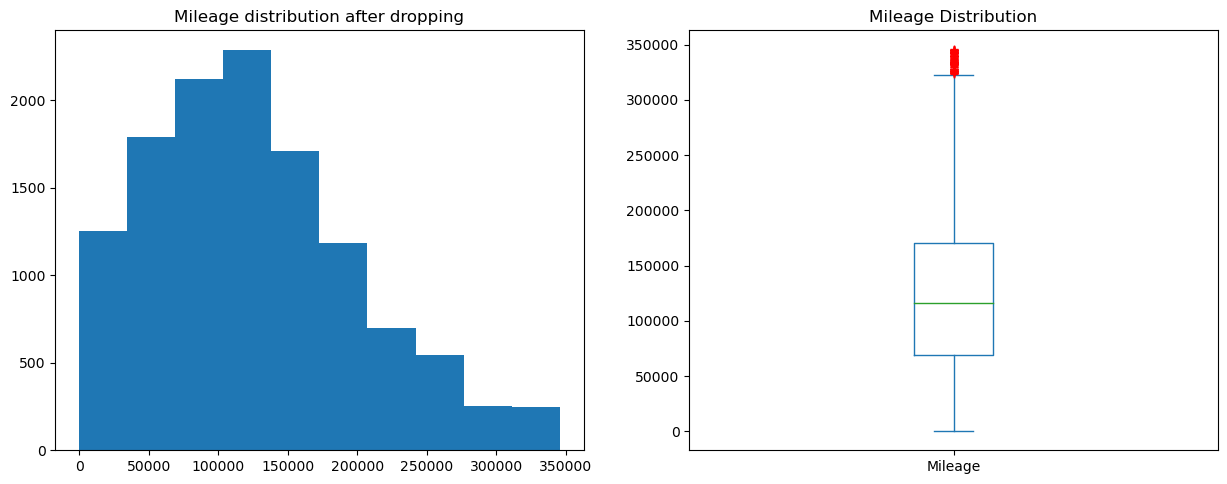

In [34]:
# Mileage: check the data distribution in histogram and box plot after removing outliers
plt.figure()
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
plt.hist(car_price_outlier_dropping["Mileage"])
plt.title("Mileage Distribution after Dropping Outliers")
plt.subplot(2,2,2)
price = car_price_outlier_dropping["Mileage"]
price.plot(kind='box',title='Mileage Distribution after Dropping Outliers',sym='r+');

####  Dropping Levy Outliers

<Figure size 640x480 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<AxesSubplot:>

(array([1.0301e+04, 1.6700e+03, 8.7000e+01, 1.0000e+01, 1.0000e+01,
        3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([   87. ,  1249.7,  2412.4,  3575.1,  4737.8,  5900.5,  7063.2,
         8225.9,  9388.6, 10551.3, 11714. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Levy Distribution')

<AxesSubplot:>

<AxesSubplot:title={'center':'Levy Distribution'}>

<Figure size 640x480 with 0 Axes>

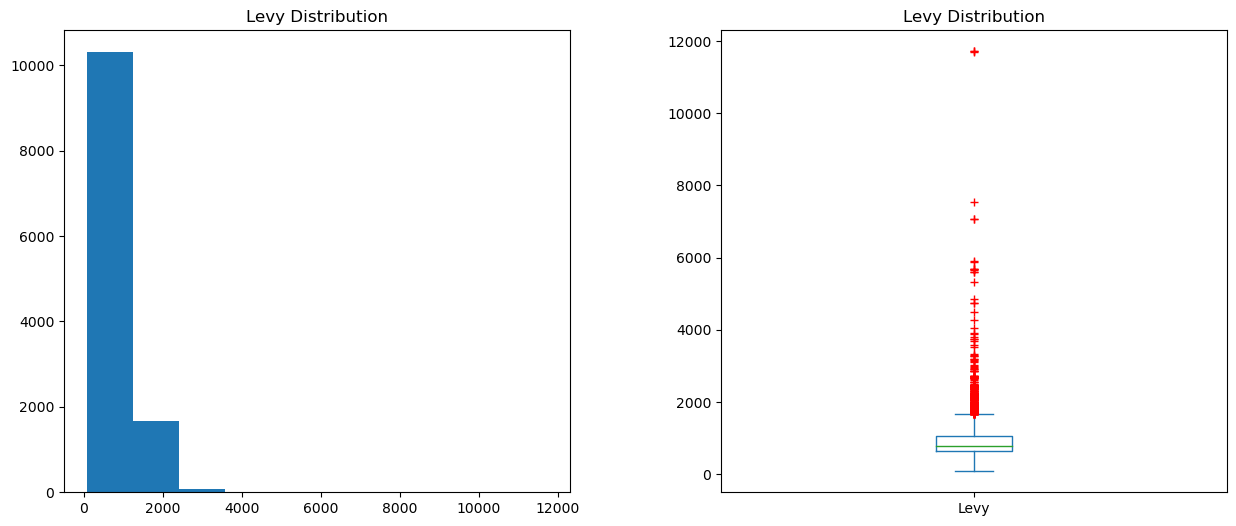

In [35]:
# Third, dealing with the levy outliers. 
# From the boxplot and histogram, it is obvious that there are many outliers of levy 
# The total levy outliers dropped here is 584.

# Levy: check the current data distribution in histogram and box plot
plt.figure()
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
plt.subplots_adjust(wspace = 0.3, hspace =0)
plt.hist(car_price_outlier_dropping["Levy"])
plt.title('Levy Distribution')
plt.subplot(2,2,2)
price = car_price_outlier_dropping["Levy"]
price.plot(kind='box',title='Levy Distribution',sym='r+')

In [36]:
# Levy: Identify the outliers in column "Levy", there are 584 in total
out_levy = outlier_index("Levy",car_price_outlier_dropping)
total_levy_outlier = len(out_levy)
print(total_levy_outlier)

584


In [37]:
# Levy: drop the outliers
car_price_outlier_dropping = car_price_outlier_dropping.drop(out_levy)

<Figure size 640x480 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<AxesSubplot:>

(array([  21.,  607., 1073., 2722., 2885., 1581., 1170.,  756.,  436.,
         250.]),
 array([  87. ,  245.8,  404.6,  563.4,  722.2,  881. , 1039.8, 1198.6,
        1357.4, 1516.2, 1675. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Levy Distribution after dropping Outliers')

<AxesSubplot:>

<AxesSubplot:title={'center':'Levy Distribution after Dropping Outliers'}>

<Figure size 640x480 with 0 Axes>

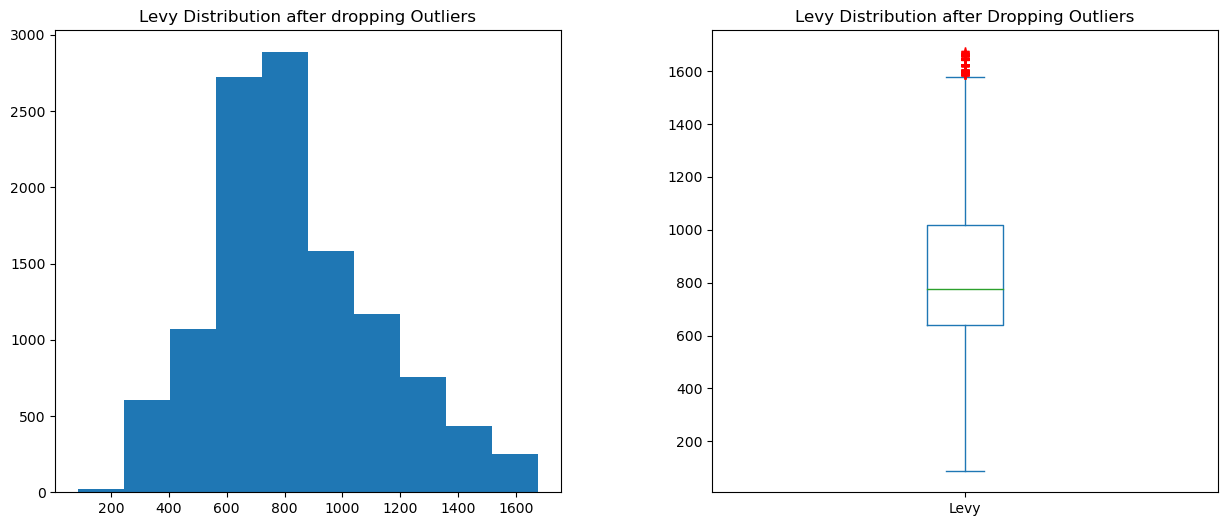

In [38]:
# Levy: check the data distribution in histogram and box plot after removing outliers
plt.figure()
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
plt.subplots_adjust(wspace = 0.3, hspace =0)
plt.hist(car_price_outlier_dropping["Levy"])
plt.title('Levy Distribution after Dropping Outliers')
plt.subplot(2,2,2)
price = car_price_outlier_dropping["Levy"]
price.plot(kind='box',title='Levy Distribution after Dropping Outliers',sym='r+')

Until this step, all the outliers in this dataset has been removed. An overview of the dataset after cleaning is shown as below.

In [39]:
# get an overview of the new dataset
car_price_outlier_dropping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11501 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                11501 non-null  int64  
 1   Price             11501 non-null  int64  
 2   Levy              11501 non-null  float64
 3   Manufacturer      11501 non-null  object 
 4   Model             11501 non-null  object 
 5   Prod. year        11501 non-null  int64  
 6   Category          11501 non-null  object 
 7   Leather interior  11501 non-null  bool   
 8   Fuel type         11501 non-null  object 
 9   Engine volume     11501 non-null  float64
 10  Mileage           11501 non-null  int64  
 11  Cylinders         11501 non-null  float64
 12  Gear box type     11501 non-null  object 
 13  Drive wheels      11501 non-null  object 
 14  Doors             11501 non-null  int64  
 15  Wheel             11501 non-null  object 
 16  Color             11501 non-null  object

In [40]:
car_price_outlier_dropping.reset_index(drop=True).head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,True,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,False,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8
2,45769185,3607,862.0,FORD,Escape,2011,Jeep,True,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0
3,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,True,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4
4,45802912,39493,891.0,HYUNDAI,Santa FE,2016,Jeep,True,Diesel,2.0,160931,4.0,Automatic,Front,4,Left wheel,White,4


## Facts about the Dataset

### Summary Statistics

In [41]:
# After cleaning the data, now we would like to do the summary of the dataset to provide some brief information about our dataset.
car_price_outlier_dropping.describe()

,ID,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags
count,1.150100e+04,11501.000000,11501.000000,11501.000000,11501.000000,11501.000000,11501.000000,11501.000000,11501.000000
mean,4.566672e+07,15430.437962,828.797061,2013.156073,2.210156,123567.307365,4.383097,3.969220,6.903487
std,4.816244e+05,13084.345871,288.754906,2.736085,0.722162,73622.053489,0.939013,0.246207,4.432262
min,3.175700e+07,1.000000,87.000000,1993.000000,0.000000,0.000000,1.000000,2.000000,0.000000
25%,4.572490e+07,3607.000000,639.000000,2011.000000,1.800000,69000.000000,4.000000,4.000000,4.000000
50%,4.577116e+07,13793.000000,777.000000,2013.000000,2.000000,115312.000000,4.000000,4.000000,4.000000
75%,4.580307e+07,22266.000000,1017.000000,2015.000000,2.500000,167510.000000,4.000000,4.000000,12.000000
max,4.581665e+07,53154.000000,1675.000000,2020.000000,5.700000,345673.000000,16.000000,4.000000,16.000000


In the above table, we can see various information, such as mean, standard deviation, different quantiles, etc. For example, from the value of standard deviation in  **`Price`** and **`Mileage`**, we can see the difference betweeen each data point in these two columns is relatively large.

### Data Visulization

**Top 10 Cars in Mileage**

In [42]:
# First, it depicts the top 10 cars in mileage. 
# We can see that Toyota Highlander occurs the most, so the quality of this brand may be considered as good. 
# Also, we can see that the mileage of top 10 cars are very close to each other.

mileage_10_large = car_price_outlier_dropping["Mileage"].sort_values().unique()[-10:]
index_mile = car_price_outlier_dropping[car_price_outlier_dropping['Mileage'].isin(mileage_10_large)].index.tolist()
#mileage_10_large
#index_mile
mile = list(car_price_outlier_dropping.loc[index_mile,"Mileage"])
manu = list(car_price_outlier_dropping.loc[index_mile,"Manufacturer"])
model = list(car_price_outlier_dropping.loc[index_mile,"Model"])
draw_mile = pd.DataFrame({"mile":mile,"manu":manu,"model":model})
sorted_df = draw_mile.sort_values(by='mile')
#sorted_df
mile_draw = list(sorted_df["mile"])
manu_draw = list(sorted_df["manu"])
model_draw = list(sorted_df["model"])
mm= []
for i in range(len(manu_draw)):
    item = manu_draw[i]+" "+model_draw[i]
    mm.append(item)

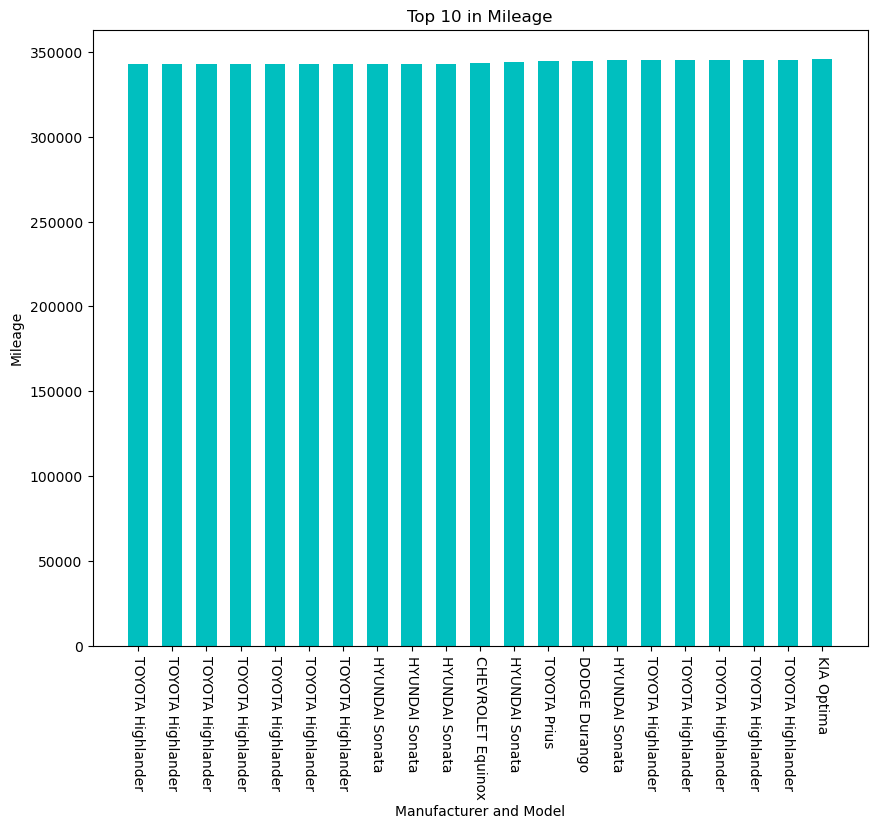

In [43]:
x_pos = list(range(1,22))
bar_width = 0.6
fig = plt.figure(figsize=(10, 8))
x_t = plt.xticks(x_pos, mm)
y_t = plt.xticks(rotation=270)
x_l = plt.xlabel('Manufacturer and Model')
y_l = plt.ylabel('Mileage')
tit = plt.title("Top 10 in Mileage")
bar = plt.bar(x_pos, mile_draw, color ='c', width = bar_width, align = 'center')
plt.show()

**Top 10 Cars in Price**

In [44]:
# Second, the top 10 cars in price is depicted. 
# From the graph below, we can see that the HYUNDAI Santa FE has the highest price.
# Besides, the distribution is very simillar to the distribution of mileage.

price_10 = car_price_outlier_dropping["Price"].sort_values().unique()[-10:]
index_price = car_price_outlier_dropping[car_price_outlier_dropping['Price'].isin(price_10)].index.tolist()
price = list(car_price_outlier_dropping.loc[index_price,"Price"])
man_p = list(car_price_outlier_dropping.loc[index_price,"Manufacturer"])
model_p = list(car_price_outlier_dropping.loc[index_price,"Model"])
draw_price = pd.DataFrame({"price":price,"manu":man_p,"model":model_p})
sorted_price = draw_price.sort_values(by='price')
#sorted_price
price_draw = list(sorted_price["price"])
manup_draw = list(sorted_price["manu"])
modelp_draw = list(sorted_price["model"])
pmm= []
for i in range(len(manup_draw)):
    item = manup_draw[i]+" "+modelp_draw[i]
    pmm.append(item)

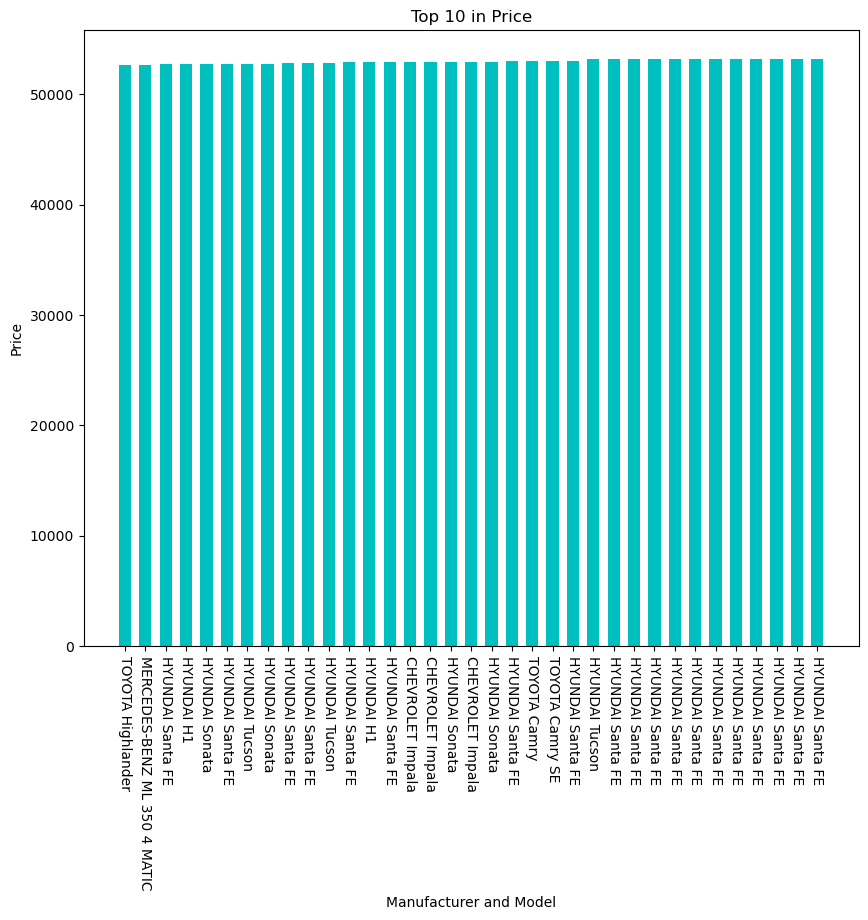

In [45]:
x_pos = list(range(1,36))
bar_width = 0.6
fig = plt.figure(figsize=(10, 8))
x_t = plt.xticks(x_pos, pmm)
y_t = plt.xticks(rotation=270)
x_l = plt.xlabel('Manufacturer and Model')
y_l = plt.ylabel('Price')
tit = plt.title("Top 10 in Price")
bar = plt.bar(x_pos, price_draw, color ='c', width = bar_width, align = 'center')
plt.show()

**Mileage Disrtibution**

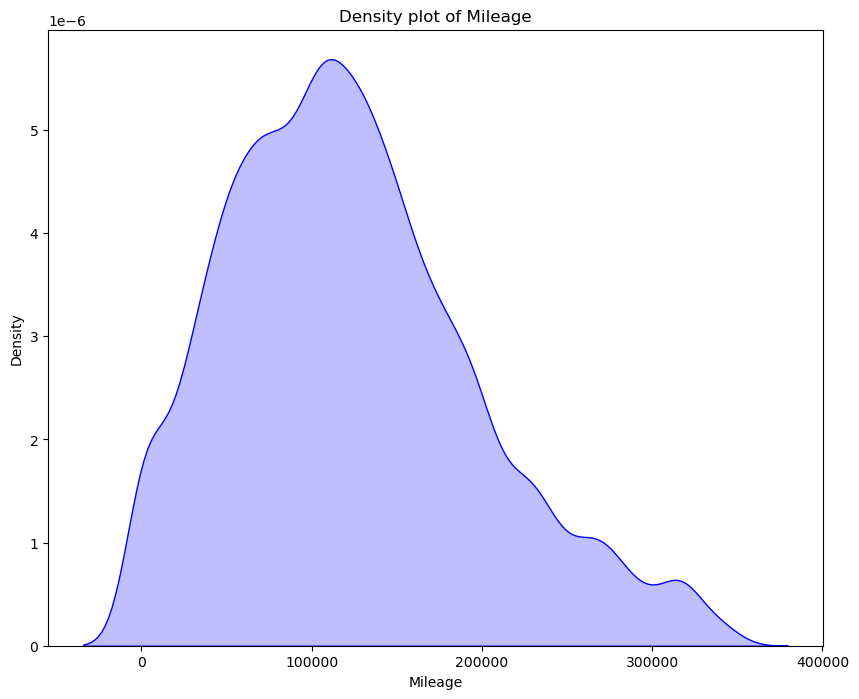

In [46]:
# Moreover, from the summary statistics, Mileage is a column we should pay some attention to.
# The minimum value of this column is 0, which means some of the cars is new. 
# But it also has the largest standard deviation which implies that the usage of the cars in the dataset is varied.
# A figure is plotted below to see the mileage distribution.

size = plt.figure(figsize=(10, 8))
plot = sns.kdeplot(car_price_outlier_dropping["Mileage"],fill=True,color='b')
tit = plt.title("Density plot of Mileage")

**Price Distribution**

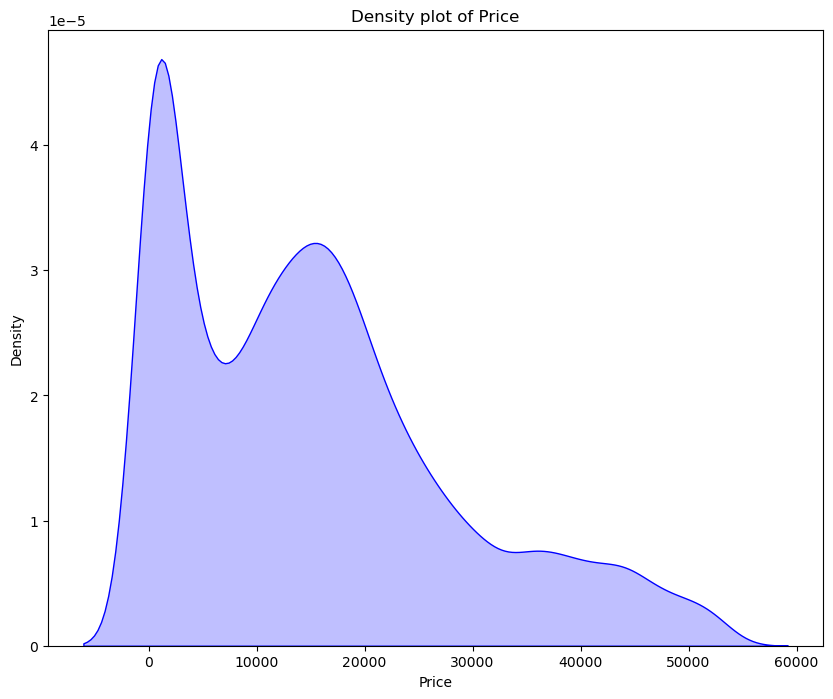

In [47]:
# Moreover, the Price is an interesting column as well. 
# From the summary statistics, we can see there is a large range of price. 
# Based on the plot below, we can see the price of the most of the cars fall between 0 dollar and 10000 dollars.
# Also, many cars also have a price between 10000 dollars to 20000 dollars.

size = plt.figure(figsize=(10, 8))
plot = sns.kdeplot(car_price_outlier_dropping["Price"],fill=True,color='b')
tit = plt.title("Density plot of Price")

**Production Year distrbution**

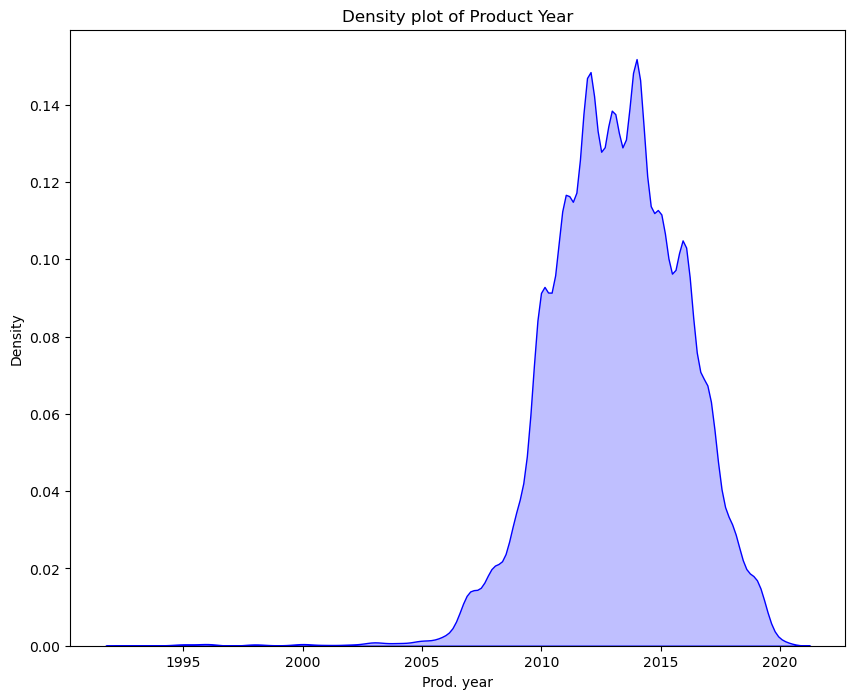

In [48]:
# Furthermore, the production year of the car is explored. 
# The years of production of these cars in dataset include a wide range of time, from 1995 even earlier to 2020. 
# From the figure below, most of the cars in the dataset are produced between 2010 to 2017.

fig = plt.figure(figsize=(10, 8))
plot = sns.kdeplot(car_price_outlier_dropping['Prod. year'],fill=True,color='b')
tit = plt.title("Density plot of Product Year")

**Driver Wheels**

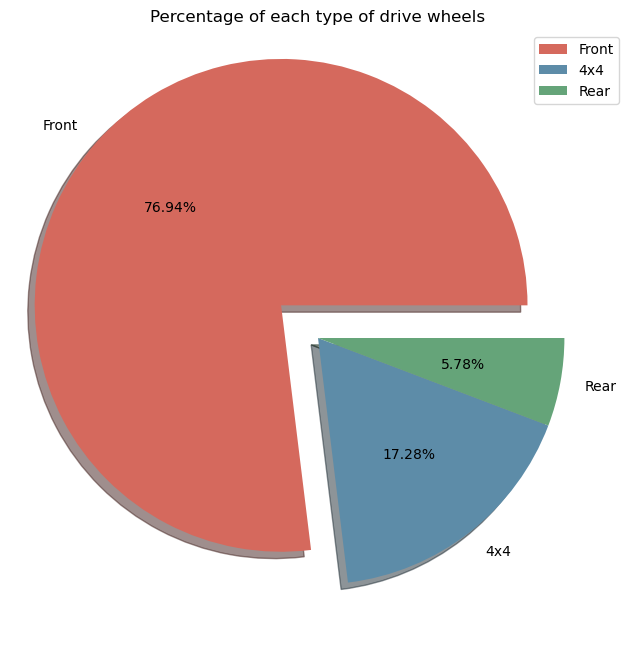

In [49]:
# What's more, among the most of the categorial value, there is not too much to explore. 
# A pie chart is depicted for the driver wheel.
# We can see that the "Front" type drive wheels is the most popular type in the dataset.

drive_wheels_type = list(car_price_outlier_dropping["Drive wheels"].value_counts())
fig_s = plt.figure(figsize=(10, 8))
fig = plt.pie(drive_wheels_type,
        labels=['Front','4x4','Rear'], 
        colors=["#d5695d", "#5d8ca8", "#65a479", "#a564c9"],
        explode = (0.2,0,0),
        autopct='%.2f%%',
        shadow = True,
       )
tit = plt.title("Percentage of each type of drive wheels") 
led = plt.legend()
plt.show()

## Feature Selection

### Correlation Analysis: Choosing the Most Important Numerical Variables

Correlation analysis is performed to check the relationships among variables; only variables that have the high correlations with price are included in model training. It only applies to the numerical values. From the correlation matrix below, based on the absolute value of the correlation coefficents, only airbags, prodcution year, mileage and cylinders are included in the model.

In [50]:
# drop ID from the dataset, since it is meaningless
# Assign the previous dataset to a new dataset "car_price_fs" for future feature selection
car_price_fs = car_price_outlier_dropping.drop(labels="ID",axis=1)
car_price_fs.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,True,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,False,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8
3,3607,862.0,FORD,Escape,2011,Jeep,True,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0
4,11726,446.0,HONDA,FIT,2014,Hatchback,True,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4
5,39493,891.0,HYUNDAI,Santa FE,2016,Jeep,True,Diesel,2.0,160931,4.0,Automatic,Front,4,Left wheel,White,4


<Figure size 1000x800 with 0 Axes>

<AxesSubplot:>

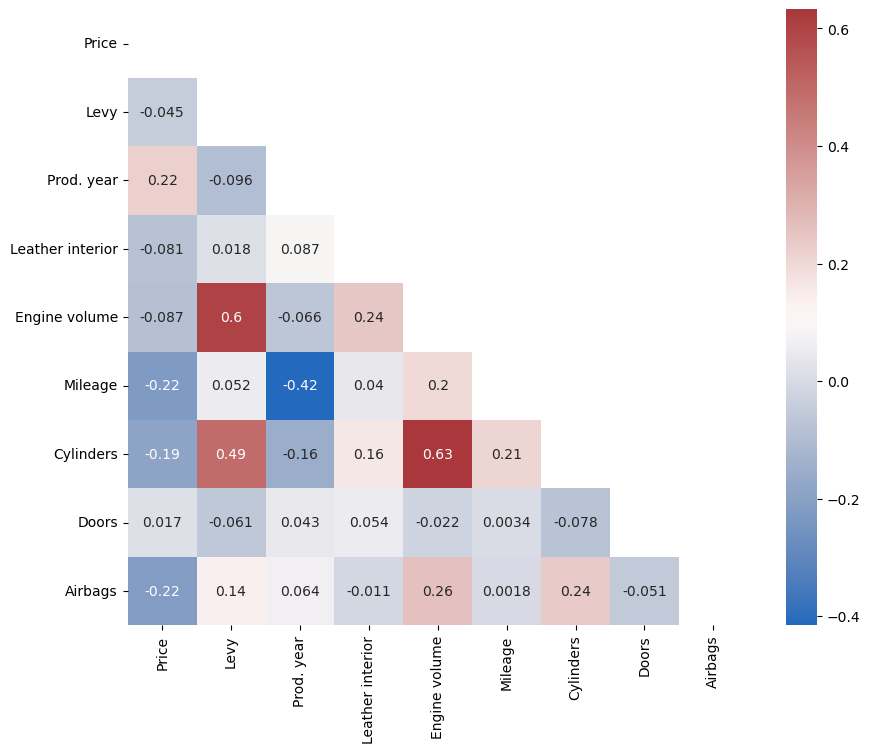

In [51]:
plt.figure(figsize=(10, 8))
# spearman able to capture the non-linear correlation
corr = car_price_fs.corr(method="spearman")
mask = np.triu(np.ones_like(corr, dtype = bool))
# red indicate positive relationship, blue indicate negative relationship
sns.heatmap(corr, mask=mask, annot=True, cbar = True, cmap="vlag") 
plt.show()

### Box Plot Analysis: Choosing the Most Important Categorical Variables

Box Plot is used to check whether there is a big difference in mean among groups. If there is a large difference, it can be included in the model, since it implies that this variable is a good predictor of the price; otherwise, it can be excluded from the model. From Analysis, only manafacturer, category, fuel type and gear box type are included in the model.



 **`Manafacturer`**: it is obvious that there is a large difference among different manafaturers, so it is included in the model.

In [95]:
car_price_fs["Manufacturer"].value_counts()

HYUNDAI          3052
TOYOTA           2231
CHEVROLET         958
MERCEDES-BENZ     910
FORD              632
LEXUS             526
HONDA             482
SSANGYONG         418
BMW               414
KIA               326
NISSAN            284
VOLKSWAGEN        282
SUBARU            154
AUDI              150
MAZDA              96
DAEWOO             90
JEEP               83
OPEL               72
MITSUBISHI         60
FIAT               46
DODGE              44
MINI               25
JAGUAR             25
SUZUKI             21
PORSCHE            16
ACURA              14
BUICK              14
RENAULT            11
CHRYSLER           11
GMC                10
CADILLAC            8
CITROEN             5
LINCOLN             5
VOLVO               4
LAND ROVER          4
INFINITI            4
MERCURY             3
MASERATI            3
VAZ                 2
PEUGEOT             2
SCION               2
SKODA               1
DAIHATSU            1
Name: Manufacturer, dtype: int64

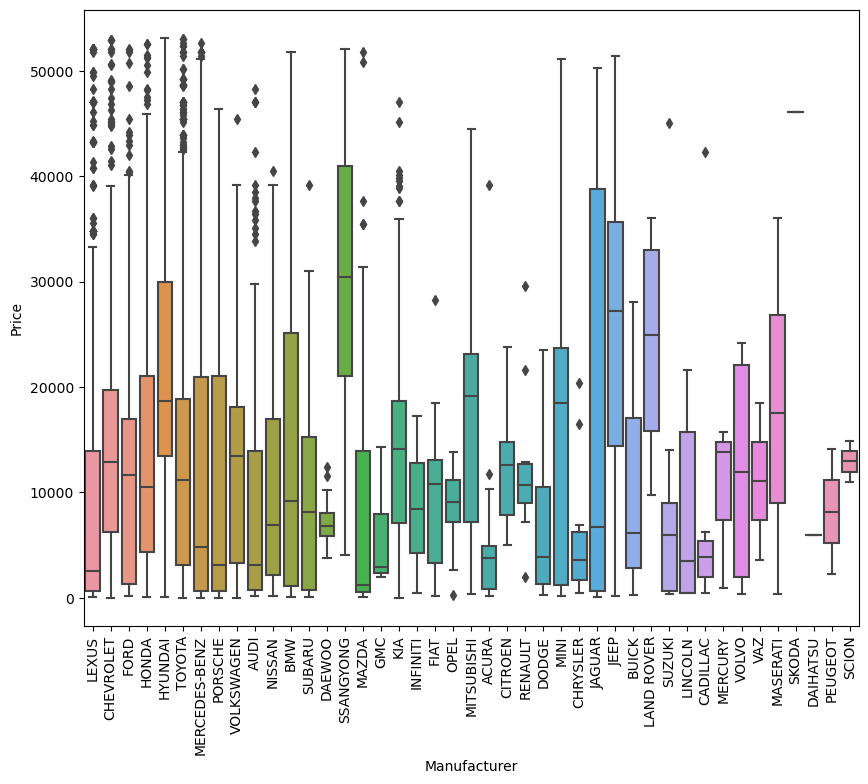

In [52]:
plt.rcParams["figure.figsize"] = (10,8)
ax = sns.boxplot(x='Manufacturer', y='Price', data=car_price_fs)
label = plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()
plt.close()

**`Model`**: it is true that there is a difference among models, but the key problem here is there are nearly 667 different types of models. If they all included in the model, it might lead to the overfitting problems. Moreover, manafatucters and models are highly correlated variables; since manafactures has already been included in the model, there is no need to include models, otherwise, it might cause the problem of colliearity. Overall, model should be excluded from the model.



In [53]:
car_price_fs["Model"].value_counts()

Elantra         827
Camry           753
Sonata          705
Prius           578
E 350           445
               ... 
C-MAX C-MAX       1
Passo             1
Passat sport      1
C 250 luxury      1
Prius C aqua      1
Name: Model, Length: 667, dtype: int64

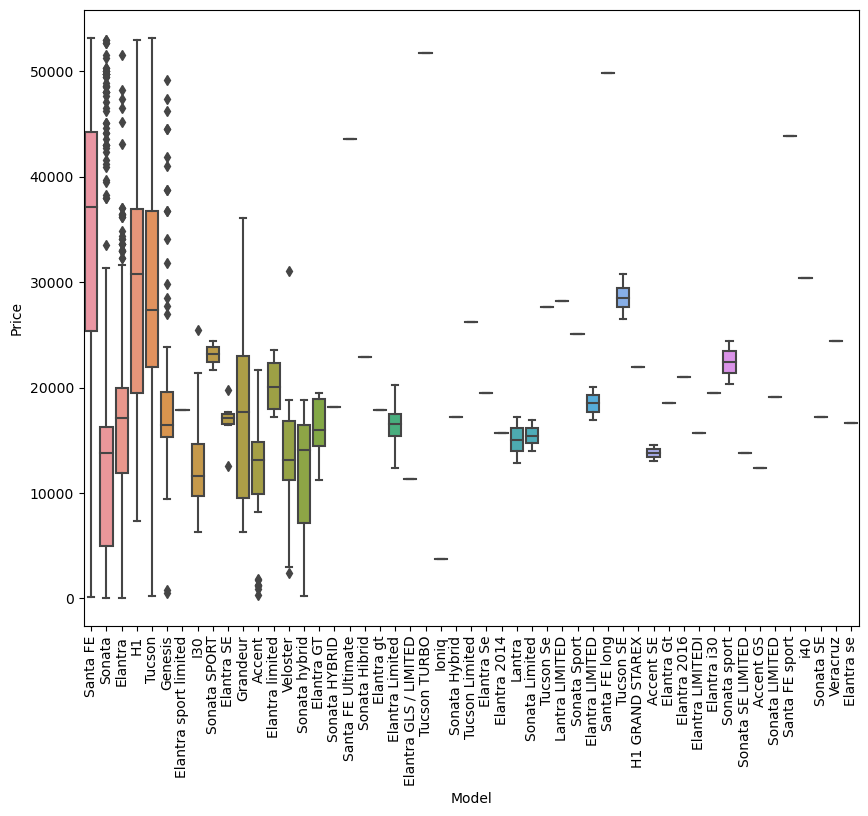

In [54]:
# Example: Models of the Manufacturer HYUNDAI
plt.rcParams["figure.figsize"] = (10,8)
ax = sns.boxplot(x='Model', y='Price', data=car_price_fs[car_price_fs['Manufacturer']=="HYUNDAI"])
label = plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()
plt.close()

**`Category`**: there is obvious differences among groups, so it is included in the model.

In [55]:
car_price_fs["Category"].value_counts()

Sedan          5561
Jeep           3469
Hatchback      1567
Minivan         322
Coupe           230
Universal       212
Goods wagon      68
Microbus         48
Pickup           14
Cabriolet        10
Name: Category, dtype: int64

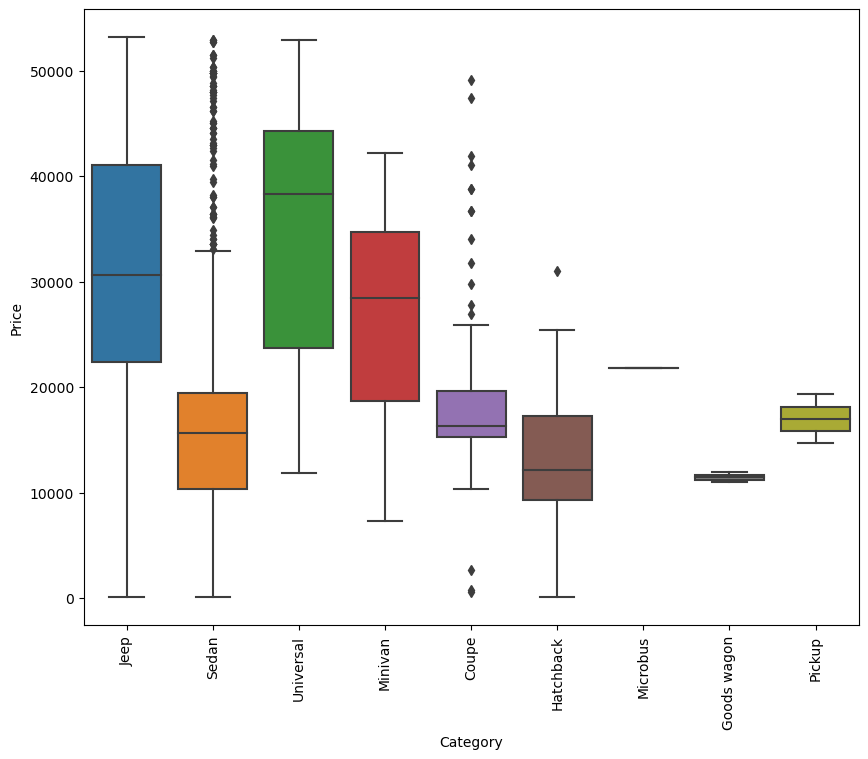

In [56]:
plt.rcParams["figure.figsize"] = (10,8)
ax = sns.boxplot(x='Category', y='Price', data=car_price_fs[car_price_fs['Manufacturer']=="HYUNDAI"])
label = plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()
plt.close()

**`Fuel type`**: though the differnece among group is not obvious like previous ones, there is large difference between Hybrid and Diesel, so it is included in the model.



In [57]:
car_price_fs["Fuel type"].value_counts()

Petrol            5730
Diesel            2910
Hybrid            2459
LPG                353
Plug-in Hybrid      39
CNG                 10
Name: Fuel type, dtype: int64

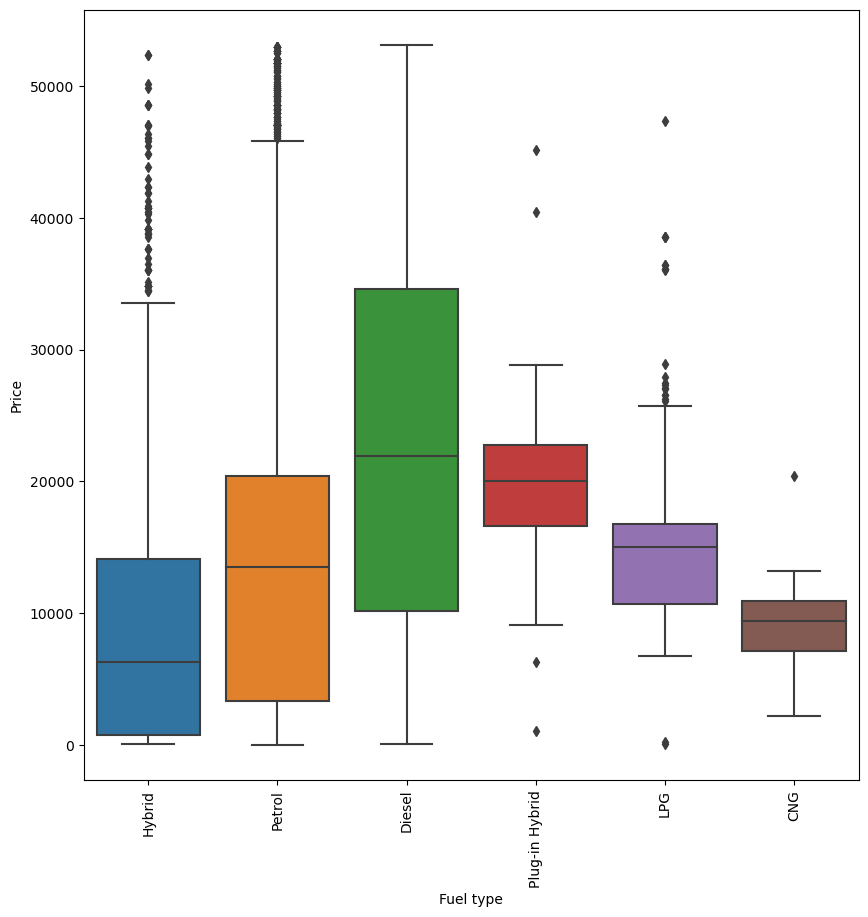

In [58]:
plt.rcParams["figure.figsize"] = (10,10)
ax = sns.boxplot(x='Fuel type', y='Price', data=car_price_fs)
label = plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()
plt.close()

**`Gear box type`**: altought the difference among most groups are not obvious, there is large difference between Tiptronic and Manual, so it is included in the model.

In [59]:
car_price_fs["Gear box type"].value_counts()

Automatic    9763
Tiptronic    1192
Variator      276
Manual        270
Name: Gear box type, dtype: int64

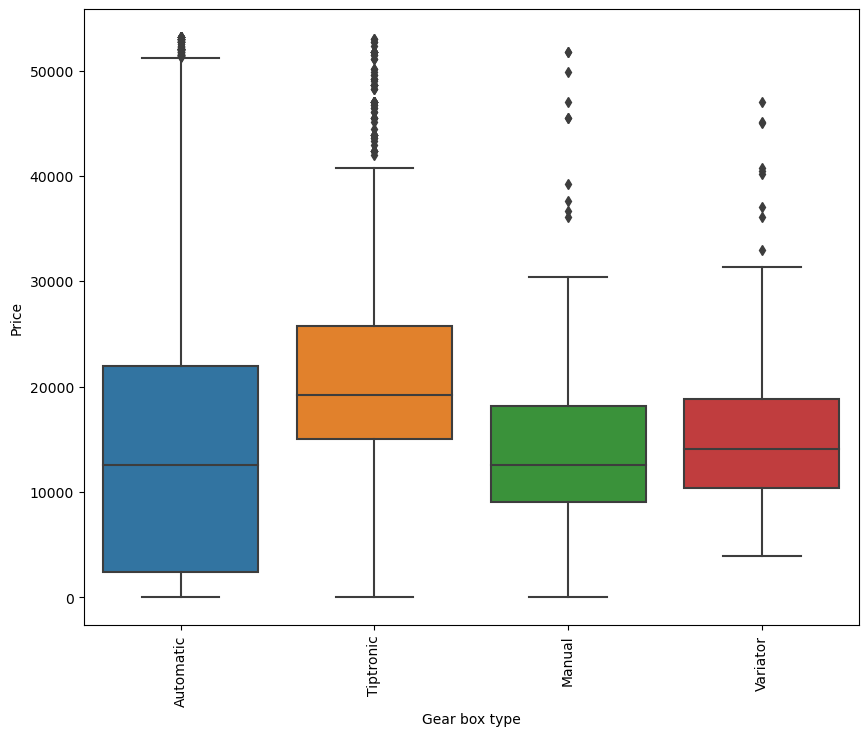

In [60]:
plt.rcParams["figure.figsize"] = (10,8)
ax = sns.boxplot(x='Gear box type', y='Price', data=car_price_fs)
label = plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()
plt.close()

**`Drive wheels`**: since the difference is not obvious enough, it is excluded from model.

In [61]:
car_price_fs["Drive wheels"].value_counts()

Front    8849
4x4      1987
Rear      665
Name: Drive wheels, dtype: int64

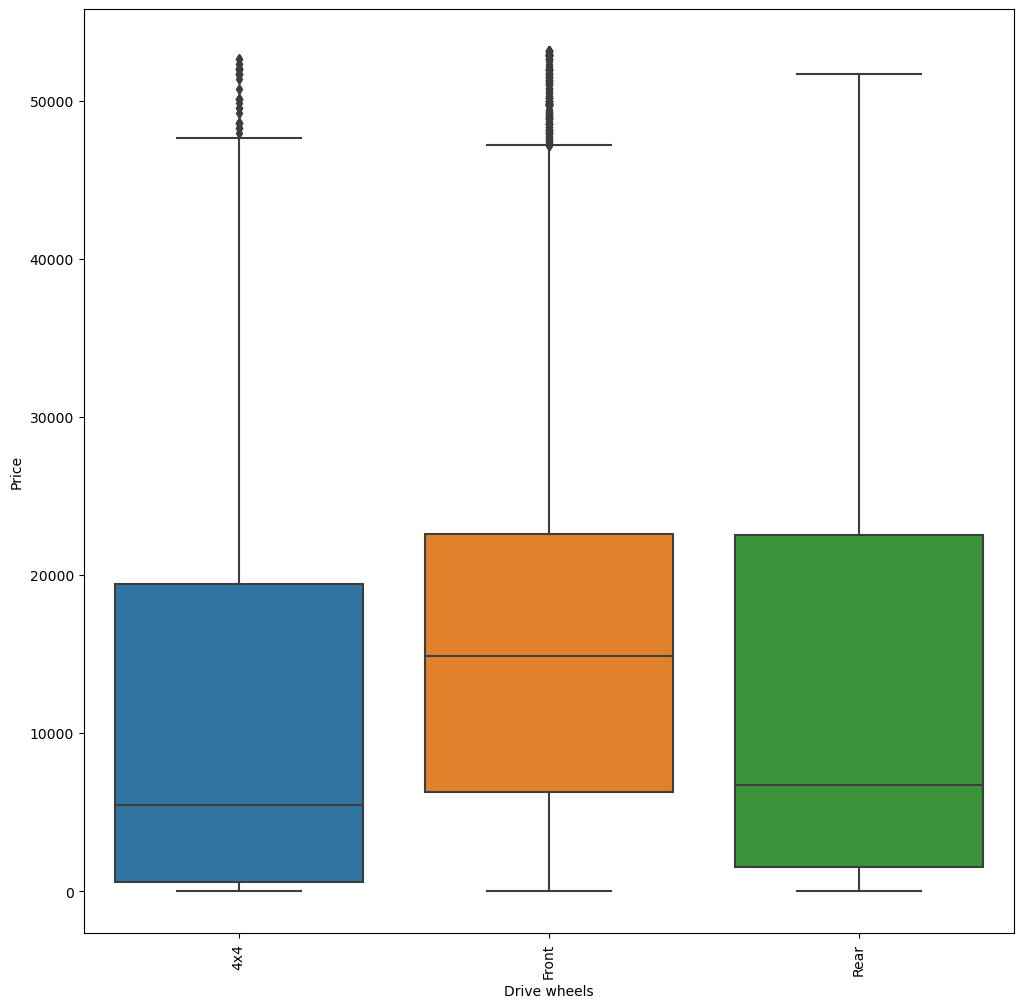

In [62]:
plt.rcParams["figure.figsize"] = (12,12)
ax = sns.boxplot(x="Drive wheels", y='Price', data=car_price_fs)
label = plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()
plt.close()

**`Wheel`**: there is no large difference among groups, so it is excluded from model.

In [63]:
car_price_fs["Wheel"].value_counts()

Left wheel          11256
Right-hand drive      245
Name: Wheel, dtype: int64

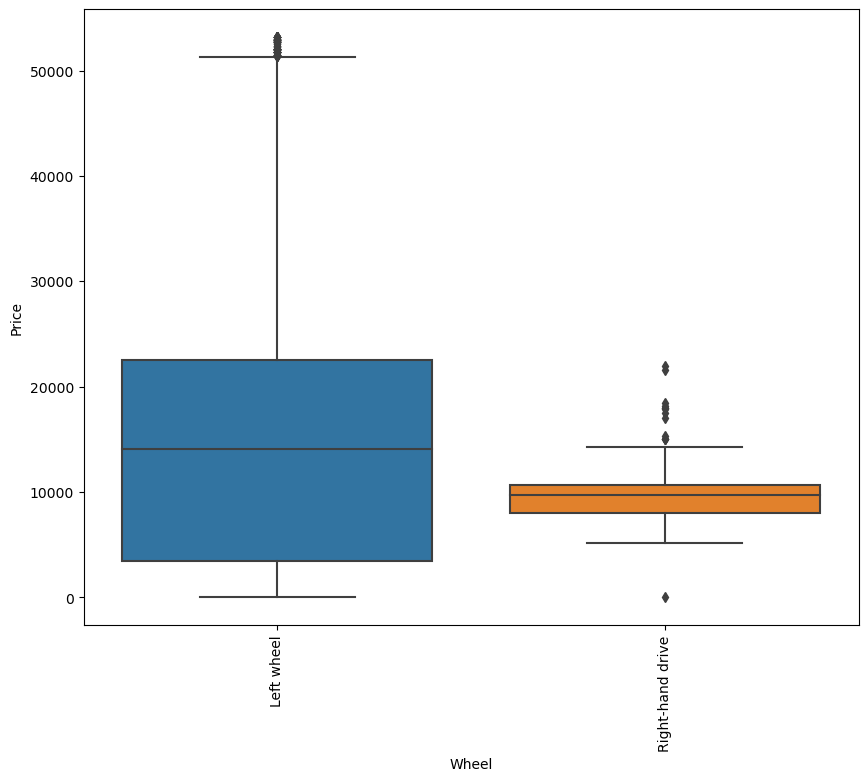

In [64]:
plt.rcParams["figure.figsize"] = (10,8)
ax = sns.boxplot(x="Wheel", y='Price', data=car_price_fs)
label = plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()
plt.close()

**`Color`**: the price difference among groups is not obvious, so it is not included in the model.

In [65]:
car_price_fs["Color"].value_counts()

Black            3070
White            2854
Silver           2230
Grey             1620
Blue              763
Red               397
Green             110
Brown             107
Carnelian red      77
Yellow             62
Orange             54
Golden             51
Sky blue           48
Beige              37
Pink               11
Purple             10
Name: Color, dtype: int64

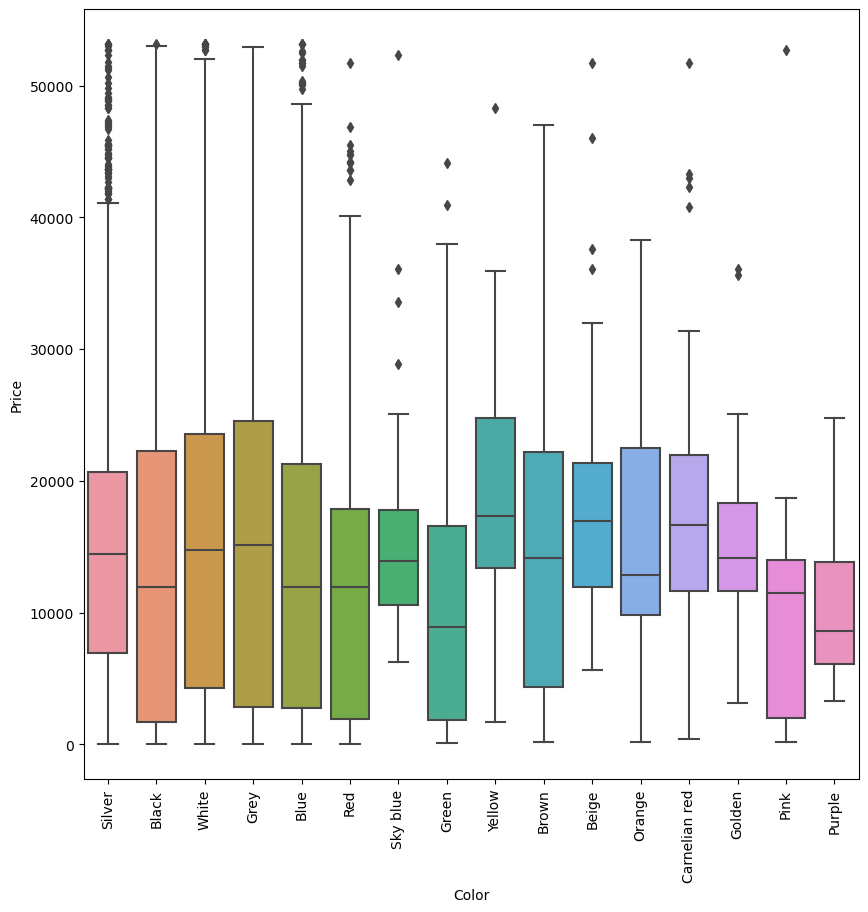

In [66]:
plt.rcParams["figure.figsize"] = (10,10)
ax = sns.boxplot(x='Color', y='Price', data=car_price_fs)
label = plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()
plt.close()

In summary, eight variables including airbags, prodcution year, mileage, cylinders, manafacturer, category, fuel type and gear box type are selected from all fifteen variables.

In [67]:
# selecting variables
variables = ["Price","Airbags","Prod. year","Mileage","Cylinders","Manufacturer","Category","Fuel type", "Gear box type"]
car_price_fs = car_price_fs[variables]

In [68]:
# overview of the new dataset after feature selection
car_price_fs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11501 entries, 0 to 19236
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          11501 non-null  int64  
 1   Airbags        11501 non-null  int64  
 2   Prod. year     11501 non-null  int64  
 3   Mileage        11501 non-null  int64  
 4   Cylinders      11501 non-null  float64
 5   Manufacturer   11501 non-null  object 
 6   Category       11501 non-null  object 
 7   Fuel type      11501 non-null  object 
 8   Gear box type  11501 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 1.1+ MB


### Feature Engineering

In [69]:
# Assign the previous dataset to a new dataset "car_price_fe" for feature engineering
car_price_fe = car_price_fs
car_price_fe.head()

,Price,Airbags,Prod. year,Mileage,Cylinders,Manufacturer,Category,Fuel type,Gear box type
0,13328,12,2010,186005,6.0,LEXUS,Jeep,Hybrid,Automatic
1,16621,8,2011,192000,6.0,CHEVROLET,Jeep,Petrol,Tiptronic
3,3607,0,2011,168966,4.0,FORD,Jeep,Hybrid,Automatic
4,11726,4,2014,91901,4.0,HONDA,Hatchback,Petrol,Automatic
5,39493,4,2016,160931,4.0,HYUNDAI,Jeep,Diesel,Automatic


In [70]:
# As there are four categorical varaibles are used in the model, we create dummy variable columns for them.
dummy_variables = ['Category', 'Fuel type','Manufacturer', 'Gear box type']
car_price_fe = pd.get_dummies(car_price_fe, columns = dummy_variables , drop_first=True)
car_price_fe.head()

,Price,Airbags,Prod. year,Mileage,Cylinders,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Microbus,...,Manufacturer_SSANGYONG,Manufacturer_SUBARU,Manufacturer_SUZUKI,Manufacturer_TOYOTA,Manufacturer_VAZ,Manufacturer_VOLKSWAGEN,Manufacturer_VOLVO,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator
0,13328,12,2010,186005,6.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,16621,8,2011,192000,6.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,3607,0,2011,168966,4.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,11726,4,2014,91901,4.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,39493,4,2016,160931,4.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
# get an overview of new dataset
car_price_fe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11501 entries, 0 to 19236
Data columns (total 64 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       11501 non-null  int64  
 1   Airbags                     11501 non-null  int64  
 2   Prod. year                  11501 non-null  int64  
 3   Mileage                     11501 non-null  int64  
 4   Cylinders                   11501 non-null  float64
 5   Category_Coupe              11501 non-null  uint8  
 6   Category_Goods wagon        11501 non-null  uint8  
 7   Category_Hatchback          11501 non-null  uint8  
 8   Category_Jeep               11501 non-null  uint8  
 9   Category_Microbus           11501 non-null  uint8  
 10  Category_Minivan            11501 non-null  uint8  
 11  Category_Pickup             11501 non-null  uint8  
 12  Category_Sedan              11501 non-null  uint8  
 13  Category_Universal          115

### Feature Scaling

In [72]:
# assign the previous dataset to a new dataset "car_price_fsc" for feature scaling
car_price_fsc = car_price_fe

In [73]:
# Moreover, as there are large difference among numerical values, some scaling are performed.
col_list = ['Price','Prod. year', 'Mileage', 'Cylinders', 'Airbags']
scaler = StandardScaler()
car_price_fsc[col_list] = scaler.fit_transform(car_price_fsc[col_list])
car_price_fsc.head()

,Price,Airbags,Prod. year,Mileage,Cylinders,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Microbus,...,Manufacturer_SSANGYONG,Manufacturer_SUBARU,Manufacturer_SUZUKI,Manufacturer_TOYOTA,Manufacturer_VAZ,Manufacturer_VOLKSWAGEN,Manufacturer_VOLVO,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator
0,-0.160690,1.149917,-1.153550,0.848121,1.721992,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.090995,0.247404,-0.788048,0.929554,1.721992,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,-0.903672,-1.557622,-0.788048,0.616672,-0.407996,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.283132,-0.655109,0.308457,-0.430139,-0.407996,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1.839114,-0.655109,1.039460,0.507529,-0.407996,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
# get an overview of new dataset
car_price_fsc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11501 entries, 0 to 19236
Data columns (total 64 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       11501 non-null  float64
 1   Airbags                     11501 non-null  float64
 2   Prod. year                  11501 non-null  float64
 3   Mileage                     11501 non-null  float64
 4   Cylinders                   11501 non-null  float64
 5   Category_Coupe              11501 non-null  uint8  
 6   Category_Goods wagon        11501 non-null  uint8  
 7   Category_Hatchback          11501 non-null  uint8  
 8   Category_Jeep               11501 non-null  uint8  
 9   Category_Microbus           11501 non-null  uint8  
 10  Category_Minivan            11501 non-null  uint8  
 11  Category_Pickup             11501 non-null  uint8  
 12  Category_Sedan              11501 non-null  uint8  
 13  Category_Universal          115

****

# Model Training

In [75]:
# Assign the previous dataset to a new dataset car_price for following model training
car_price = car_price_fsc

## Dataset Splitting

In [76]:
# Assign all independent variables to X: just exclude price from the dataset
X = car_price.drop('Price', axis='columns')
X

,Airbags,Prod. year,Mileage,Cylinders,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Microbus,Category_Minivan,...,Manufacturer_SSANGYONG,Manufacturer_SUBARU,Manufacturer_SUZUKI,Manufacturer_TOYOTA,Manufacturer_VAZ,Manufacturer_VOLKSWAGEN,Manufacturer_VOLVO,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator
0,1.149917,-1.153550,0.848121,1.721992,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.247404,-0.788048,0.929554,1.721992,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,-1.557622,-0.788048,0.616672,-0.407996,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.655109,0.308457,-0.430139,-0.407996,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,-0.655109,1.039460,0.507529,-0.407996,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,1.149917,-0.057045,-0.214175,1.721992,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19233,0.247404,-0.788048,0.516616,-0.407996,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
19234,-0.655109,-1.153550,-0.097832,-0.407996,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
19235,-0.655109,-2.250055,-0.982212,-0.407996,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# Assign Price as the dependent variables to y
y = car_price.Price
y

0       -0.160690
1        0.090995
3       -0.903672
4       -0.283132
5        1.839114
           ...   
19231   -0.735907
19233    0.019151
19234    0.816092
19235   -0.771905
19236   -1.143434
Name: Price, Length: 11501, dtype: float64

In [78]:
# Split dataset into a training (70%) and test (30%) set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=41)

## Multiple Linear Regression

In [79]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [80]:
def modelevluation(y_pred):
    mae = round(mean_absolute_error(y_test, y_pred), 3)
    mse = round(mean_squared_error(y_test, y_pred), 3)
    rmse = round(sqrt(mse), 3)
    r2_value = round(r2_score(y_test, y_pred), 3)
    n = y_test.shape[0] # number of observations
    p = car_price.shape[1]- 1 # number of independent variables
    adj_r2 = 1-(1-r2_value)*(n-1)/(n-p-1)
    
    print('Mean Absolute Error  of the model is : {:.3f}'.format(mae))
    print('Mean Squared Error of the model is : {:.3f}'.format(mse))
    print('Root Mean Squared Error of the model is : {:.3f}'.format(rmse))
    print('R-squared value of the model is : {:.3f}'.format(r2_value))
    print('Ajusted R-sqaured value of the model is: {:.3f}'.format(adj_r2))

In [81]:
y_pred = lr.predict(X_test)
modelevluation(y_pred)

Mean Absolute Error  of the model is : 0.597
Mean Squared Error of the model is : 0.610
Root Mean Squared Error of the model is : 0.781
R-squared value of the model is : 0.401
Ajusted R-sqaured value of the model is: 0.390


#### The Most Significant Variables for the Model

These results indicate that the Gear box type and Manufacturer have the highest correlation to car price. This suggests that these two variables are the most important in predicting car price. The results also suggest that cars with manual transmission and those manufactured by SKODA and JAGUAR tend to be more expensive than other models.

In [82]:
#get coefficients for each variable
coefs = lr.coef_

#create dictionary with variable names and their corresponding coefficients
var_coefs = {car_price.columns[i]: coefs[i] for i in range(len(coefs))}

#sort dictionary by value in descending order
var_coefs_sorted = {feature: score for feature, score in sorted(var_coefs.items(), key=lambda item: item[1], reverse=True)}

#print top 3 most significant variables
print("Top 3 most significant variables:")
for variable, coef in list(var_coefs_sorted.items())[:3]:
    print(f"{variable}: {coef:.3f}")

Top 3 most significant variables:
Gear box type_Manual: 0.892
Manufacturer_SKODA: 0.697
Manufacturer_JAGUAR: 0.609


#### Error Analysis

Multiple linear regression typically makes two types of errors: bias and variance. Bias occurs when the model is oversimplified and does not accurately represent the underlying data, leading to underfitting. Variance occurs when the model is too complex and overfits to the training data, leading to poor performance on new, unseen data.

Text(0.5, 0, 'Predicted values')

Text(0, 0.5, 'Actual values')

Text(0.5, 1.0, 'Error analysis on multiple linear regression')

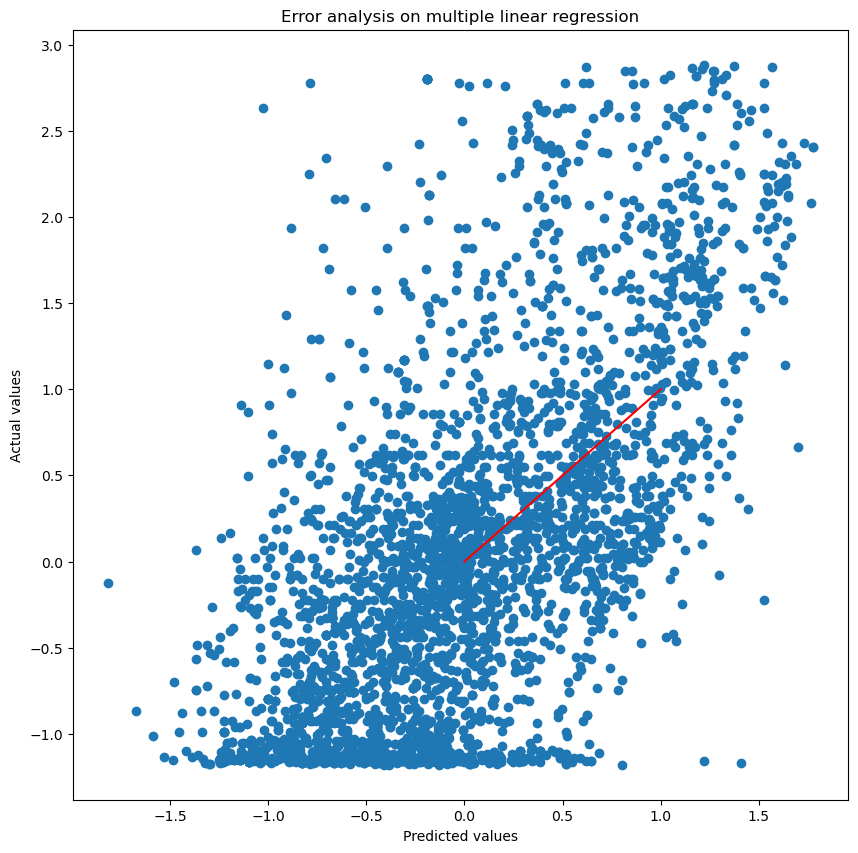

In [83]:
y_pred_lr = lr.predict(X_test)
plt.scatter(y_pred_lr, y_test)

# draw a line of best fit
x = np.linspace(0, 1, 100)
y = x
plt.plot(x, y, color='red')

# add labels and title
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Error analysis on multiple linear regression')

# show the plot
plt.show()

## Decision Tree Regressor

In [84]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [85]:
y_pred = tree_model.predict(X_test)
modelevluation(y_pred)

Mean Absolute Error  of the model is : 0.358
Mean Squared Error of the model is : 0.407
Root Mean Squared Error of the model is : 0.638
R-squared value of the model is : 0.600
Ajusted R-sqaured value of the model is: 0.593


#### The Most Significant Variables for the Model

These results indicate that the three most important variables in predicting car price are airbags, mileage, and production year. Airbags are a key safety feature; the higher numbers of airbags, the more expensive the car is likely to be. Mileage relfects the wear and tear of cars, higher mileage cars tend to be cheaper. Production year generally reflects depreciation, new cars tend to be more expensive.

In [86]:
#get the feature importance scores
importances_tree = tree_model.feature_importances_

#create a list of tuples with the feature names and their scores
feature_importances = [(feature, score) for feature, score in zip(car_price.drop('Price', axis=1).columns, importances_tree)]

#sort the list by the most significant variables
sorted_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

#print the most significant variables
print("Top 3 most significant variables:")
for feature, score in sorted_importances[:3]:
    print(f'{feature}: {score:.3f}')

Top 3 most significant variables:
Airbags: 0.287
Prod. year: 0.183
Mileage: 0.179


#### Error Analysis

A tree model can produce inaccurate predictions when predicting the price of a car due to its reliance on a set of predetermined conditions. Overfitting can also lead to errors, as the model can become too complex and attempt to fit too many conditions, resulting in inaccurate predictions.

Text(0.5, 0, 'Predicted values')

Text(0, 0.5, 'Actual values')

Text(0.5, 1.0, 'Error analysis on decision tree regressor')

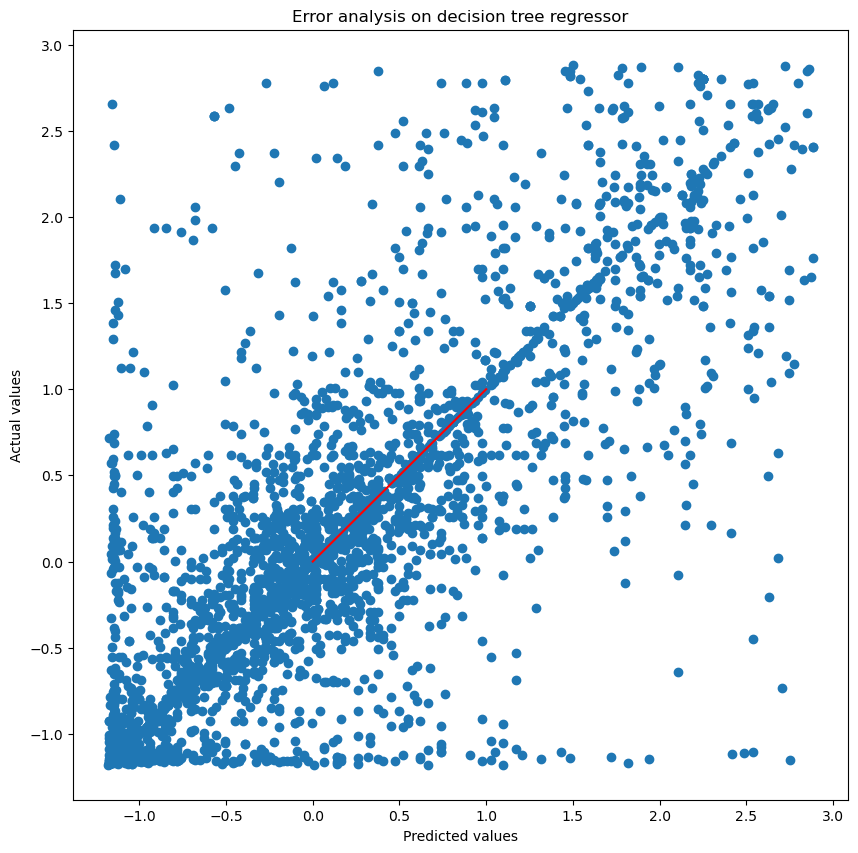

In [87]:
y_pred_tree = tree_model.predict(X_test)
plt.scatter(y_pred_tree, y_test)

# draw a line of best fit
x = np.linspace(0, 1, 100)
y = x
plt.plot(x, y, color='red')

# add labels and title
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Error analysis on decision tree regressor')

# show the plot
plt.show()

## Random Forest Regressor

In [88]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 41)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=41)

In [89]:
y_pred = rf.predict(X_test)
modelevluation(y_pred)

Mean Absolute Error  of the model is : 0.308
Mean Squared Error of the model is : 0.270
Root Mean Squared Error of the model is : 0.520
R-squared value of the model is : 0.735
Ajusted R-sqaured value of the model is: 0.730


#### The Most Significant Variables for the Model

The top 3 most significant variables for the decision tree and random forest are the same. This is because they use a similar approach to determine the importance of features: they both use a measure of the decrease in impurity (Gini Impurity or Entropy) to determine which features have the biggest impact on the prediction of the target variable. As such, they both prioritize the same features, regardless of the model used.

In [90]:
#get the feature importance scores
importances_rf = rf.feature_importances_

#create a list of tuples with the feature names and their scores
feature_importances = [(feature, score) for feature, score in zip(car_price.drop('Price', axis=1).columns, importances_rf)]

#sort the list by the most significant variables
sorted_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

#print the most significant variables
print("Top 3 most significant variables:")
for feature, score in sorted_importances[:3]:
    print(f'{feature}: {score:.3f}')

Top 3 most significant variables:
Airbags: 0.285
Prod. year: 0.182
Mileage: 0.178


#### Error Analysis

Random forest regressor makes errors due to bias and variance, similar to multiple linear regression and decision tree regressor. However, random forest regressor also makes errors due to the randomness in its construction, where some trees may be too deep and others may be too shallow, leading to a lack of consistency in the model's predictions.

Text(0.5, 0, 'Predicted values')

Text(0, 0.5, 'Actual values')

Text(0.5, 1.0, 'Error analysis on random forest regressor')

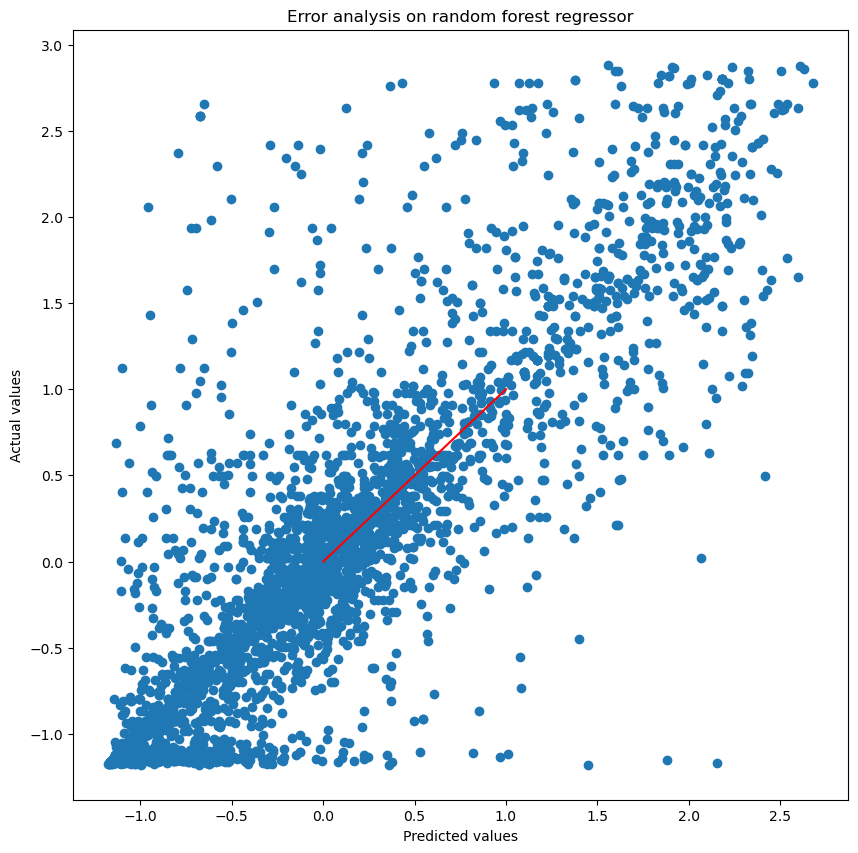

In [91]:
y_pred_rf = rf.predict(X_test)
plt.scatter(y_pred_rf, y_test)

# draw a line of best fit
x = np.linspace(0, 1, 100)
y = x
plt.plot(x, y, color='red')

# add labels and title
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Error analysis on random forest regressor')

# show the plot
plt.show()

## Model Evalution

#### Measure and Compare Model Performance

The performance of the models can be measured by R-squared. The R-squared is a measure of how well the model fits the data and is calculated by taking the difference between the actual values and the predicted values of the model. The higher the value of R-squared, the better the model is. In this case, the R-squared for the multiple linear regression, decision tree and random forest models are 39%, 60%, and 73% respectively. This indicates that the random forest regressor is the most accurate model in predicting car prices.

#### Error Analysis

The trend in errors across three models of this report suggests that more complex models such as random forest are more suitable for this task. This is because they are able to provide more accurate predictions for a wider range of prices, as well as being able to pick up on non-linear relationships in the data. However, the analysis of errors also revealed that the models are not accurate in predicting the prices of cheap and expensive cars. To address this, alterations to the variables need to be made in order to target these lower and higher end car prices, and any outliers identified from the error analysis must also be addressed in order to further improve the model.

#### Shortlisting the Most Promising Model

We are shortlisting **random forest regressor model** due to its accuracy and scalability. This model is able to provide accurate predictions with minimal error relative to the other models, and it can easily handle an increasing dataset. This is especially important for used car dealerships, as it is paramount for them to construct a fair and accurate quote for both the customer and the dealership. Furthermore, this model can scale with larger datasets as the business expands. 

The algorithm is designed to be more accurate than manual methods, allowing dealers to offer the best possible price. This can lead to increased margins and profits, helping them stay competitive in the market. With the random forest regressor model, dealers can improve their efficiency and accuracy.

#### Hyper Parameter Adjustment

The Random Forest Regressor appears to be the best model based on its high adjusted R-squared value. To further optimize its performance, we could adjust its parameters; for instance, the estimator currently used is 100, but other values may yield better results.

In [92]:
# Model Ajustment: find the most apporaite estimators
dictionary = {}
for i in range(1,500,50):
    rf = RandomForestRegressor(n_estimators = i, random_state = 41)
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    r2_value = round(r2_score(y_test, y_pred), 3)
    dictionary[i] = r2_value

max_value = 0
max_index = 0
for idx,value in dictionary.items():
    if value > max_value:
        max_value = value
        max_index = idx

RandomForestRegressor(n_estimators=1, random_state=41)

RandomForestRegressor(n_estimators=51, random_state=41)

RandomForestRegressor(n_estimators=101, random_state=41)

RandomForestRegressor(n_estimators=151, random_state=41)

RandomForestRegressor(n_estimators=201, random_state=41)

RandomForestRegressor(n_estimators=251, random_state=41)

RandomForestRegressor(n_estimators=301, random_state=41)

RandomForestRegressor(n_estimators=351, random_state=41)

RandomForestRegressor(n_estimators=401, random_state=41)

RandomForestRegressor(n_estimators=451, random_state=41)

In [93]:
print("The numbers of estimator which can give the best result is {}.".format(max_index))
print("The correpsonding R square of the best numbers of estimator is {}.".format(max_value))

The numbers of estimator which can give the best result is 251.
The correpsonding R square of the best numbers of estimator is 0.737.


****

# Conclusion and Recommendation

The report explored various factors to predict the price of cars in order to guide car dealerships to set a price that will maximise demand, increase their margins and ultimately maximise their profit.

With all findings in this report, to guarantee a successful pricing strategy, this report would recommend car dealers to deploy **random forest** model when predicting car prices. Based on that, it is important to focus on the three most relevant car features: **Number of Airbags**, **Production Year** and **Mileage**.

****

# Reference

Automotive Training Centre. 2022. *Understanding What’s Included in Car Sales Price Quotes*. [Online]. [Accessed 02 December 2022]. Available from: https://www.autotrainingcentre.com/blog/understanding-included-car-sales-price-quotes/

Biglaiser, G., Li, F., Murry, C., and Zhou, Y. 2020. *Intermediaries and Product Quality in Used Car Markets*. The Rand journal of economics. 51(3), pp.905-933

Concept Car Credit. 2022. *Car prices in the UK: The Secret to Paying Less and Getting a Better Car*. [Online]. [Accessed 02 December 2022]. Available from: https://www.conceptcarcredit.co.uk/car-prices-in-the-uk-the-secret-to-paying-less-and-getting-a-better-car/

Pratt, M. 2022. *How to get the best price on a car*. [Online]. [Accessed 03 December 2022]. Available from: https://www.which.co.uk/reviews/new-and-used-cars/article/how-to-get-the-best-price-on-a-car-a8RS40y5XsMm

The Car Expert. 2020. *Used car pricing: Why are cars sometimes advertised at two different prices*. [Online]. [Accessed 03 December 2022]. Available from: https://www.thecarexpert.co.uk/used-car-pricing-different-prices/

U.S. Census Bureau. 2022. *Why We Ask Questions About Vehicles Available*. [Online]. [Accessed 02 December 2022]. Available from: https://www.census.gov/acs/www/about/why-we-ask-each-question/vehicles/